<div class="alert alert-block alert-info">
<h1>Transformation/normalisation/scaling : <code>4-normalisation_scaling.ipynb</code></h1>
</div>

---

### The purpose of this notebook is to use different methods to normalise the data in our peak table :

- #### Transformation : Each value in the peak table is transformed individually, based on a mathematical function
- #### Scaling : Each value in the peak table is transformed based on other values in the same column (feature/metabolite-based)
- #### Normalisation : Each value in the peak table is transformed based on other values in the same row (sample-based)

For each of these three main type of data manipulation, different methods are implemented in this notebook

---

### References 

- Why normalisation : https://pubmed.ncbi.nlm.nih.gov/32276547/

- Sample normalisation : https://pubmed.ncbi.nlm.nih.gov/26763302/

---

# Table of contents
- [0 - Import modules](#0---Import-modules)
- [0 - Import useful functions](#0---Import-useful-functions)
- [0 - Import peak table](#0---Import-peak-table)
  - [a - Keep only intensities in the following dataframe](#a---Keep-only-intensities-in-the-following-dataframe)
  - [b - Keep only metadata in the following dataframe](#b---Keep-only-metadata-in-the-following-dataframe)
  - [c - Set target feature](#c---Set-target-feature)
- [1 - Some visualisations](#1---Some-visualisations)
  - [a - Pairplots](#a---Pairplots)
  - [b - Histograms](#b---Histograms)
  - [c - Boxplots](#c---Boxplots)
- [2 - Transformation methods](#2---Transformation-methods)
  - [a - Based-e log](#a---Based-e-log)
  - [b - Based-2 log](#b---Based-2-log)
  - [c - Based-10 log](#c---Based-10-log)
  - [d - Square root](#d---Square-root)
  - [e - Cubic root](#e---Cubic-root)
- [3 - Metabolite-based Scaling Methods](#3---Metabolite-based-Scaling-Methods)
  - [a - Range scaling](#a---Range-scaling)
  - [b - Mini-max scaling](#b---Mini-max-scaling)
  - [c - Maximum absolute scaling](#c---Maximum-absolute-scaling)
  - [d - Level scaling](#d---Level-scaling)
  - [e - Robust scaling](#e---Robust-scaling)
  - [f - Autoscaling](#f---Autoscaling)
  - [g - Pareto scaling](#g---Pareto-scaling)
  - [h - Vast scaling](#h---Vast-scaling)
- [4 - Sample-based Normalisation Methods](#4---Sample-based-Normalisation-Methods)
  - [a - Mean normalisation](#a---Mean-normalisation)
  - [b - Median normalisation](#b---Median-normalisation)
  - [c - L1 normalisation](#c---L1-normalisation)
  - [d - L2 normalisation](#d---L2-normalisation)
- [5 - Combination of methods for our example](#5---Combination-of-methods-for-our-example)
---

# 0 - Import modules

In [1]:
import seaborn as sns
import pandas as pd
import random
import os

In [2]:
# Setting working directory
import re
pwd = ! pwd
pwd = re.sub('notebooks/', '', pwd[0])
pwd = '/'.join(pwd.split('/')[:-1]) + '/'
print(f'Working directory : {pwd}')

# Print Python version
python_version = ! python --version
print(f'Python version : {python_version[0]}')

Working directory : /home/jovyan/work/
Python version : Python 3.10.4


In [3]:
# Tune the visual settings for figures in seaborn
sns.set_context(
    "notebook", font_scale=1.2, rc={"axes.titlesize": 15}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 12, 8

sns.set_theme(style="darkgrid")

# 0 - Import useful functions

In [4]:
# In the bin folder, python scripts containing useful functions can be found.
# Functions for data exploration are located in file missing_value_imputation_functions.py

import sys
sys.path.append(pwd + 'bin/')

from normalisation_scaling_functions import *

# 0 - Import peak table

In [5]:
filename_imputed = [file for file in os.listdir(pwd + 'data/synthetic_dataset/imputed_peak_tables/chosen_imputed_peakTable/') if file.endswith('.csv')][0]
filename_imputed

'peakTable-python_MICE_ExtraTreesRegressor.csv'

We can see above the most adapted imputation method for our peak table, determined in the previous notebook !

In [6]:
peakTable_imputed = pd.read_csv(pwd + 'data/synthetic_dataset/imputed_peak_tables/chosen_imputed_peakTable/' + filename_imputed,
                                sep=',', decimal='.', na_values='NA')
peakTable = peakTable_imputed.copy()
peakTable

,SampleID,Disease,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,CRR_001,CRR,227.826520,117.012086,750.015310,106.848690,941.250268,28.308256,46.263365,1744.688754,...,23332.588540,345.695685,2.631216,130.294107,19.170914,5.194313,166.610410,77.783406,8.630945,62.252431
1,CRR_002,CRR,587.927618,129.710850,594.600666,145.488720,896.401881,27.842101,73.665886,1551.050083,...,19571.422043,242.840315,1.981778,109.935021,4.669376,112.927400,180.437923,53.271213,118.352041,73.772876
2,CRR_003,CRR,300.819627,208.803545,649.198550,99.151068,634.809418,7.656808,211.861276,1555.589994,...,3825.640322,1136.728114,301.778637,250.099082,190.029159,350.832313,293.545028,263.923145,356.792481,53.630690
3,CRR_004,CRR,574.124723,225.087555,586.409285,115.209639,628.911754,15.336427,94.711215,1643.625627,...,3900.435683,777.466659,312.186350,299.824366,266.307245,101.532018,338.136807,203.295067,188.081878,71.392762
4,CRR_005,CRR,235.369264,123.061042,638.782555,46.975815,724.054416,13.855861,85.444824,2163.577857,...,402.489171,1393.864687,202.706069,176.957407,158.474161,200.285709,769.535852,289.908010,515.551782,46.859103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,HCC_296,HCC,1307.377728,187.166724,330.124145,1100.770379,610.444945,731.605822,783.995362,804.098475,...,473.805391,354.091994,246.883160,176.488767,175.813061,331.700933,787.599359,19.945047,456.842307,55.751046
596,HCC_297,HCC,714.674697,88.631286,295.155447,217.305148,369.804011,252.653913,216.791172,462.004967,...,1839.941207,519.450121,114.346408,83.062311,89.827003,309.682566,348.038788,83.925800,365.545100,46.222988
597,HCC_298,HCC,1034.242121,699.345217,380.957087,604.125654,431.331251,309.331561,460.046415,887.358755,...,149.149811,703.127195,371.898553,286.148673,261.366945,351.607766,514.511997,111.443139,1045.644800,97.461422
598,HCC_299,HCC,870.037466,28.948919,177.750685,323.497432,299.576371,459.865707,405.623088,333.229357,...,822.090326,388.178444,44.474945,50.019532,62.189603,467.290703,181.126309,13.391195,410.875464,33.517221


## a - Keep only intensities in the following dataframe

In [7]:
intensities = peakTable.iloc[:, ['variable' in col for col in peakTable.columns]]
intensities.head()

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,227.826520,117.012086,750.015310,106.848690,941.250268,28.308256,46.263365,1744.688754,109.607280,1474.590504,...,23332.588540,345.695685,2.631216,130.294107,19.170914,5.194313,166.610410,77.783406,8.630945,62.252431
1,587.927618,129.710850,594.600666,145.488720,896.401881,27.842101,73.665886,1551.050083,92.467096,1443.736018,...,19571.422043,242.840315,1.981778,109.935021,4.669376,112.927400,180.437923,53.271213,118.352041,73.772876
2,300.819627,208.803545,649.198550,99.151068,634.809418,7.656808,211.861276,1555.589994,459.127995,1424.382600,...,3825.640322,1136.728114,301.778637,250.099082,190.029159,350.832313,293.545028,263.923145,356.792481,53.630690
3,574.124723,225.087555,586.409285,115.209639,628.911754,15.336427,94.711215,1643.625627,389.919091,1537.402022,...,3900.435683,777.466659,312.186350,299.824366,266.307245,101.532018,338.136807,203.295067,188.081878,71.392762
4,235.369264,123.061042,638.782555,46.975815,724.054416,13.855861,85.444824,2163.577857,485.004097,452.314008,...,402.489171,1393.864687,202.706069,176.957407,158.474161,200.285709,769.535852,289.908010,515.551782,46.859103


In [8]:
intensities.shape

(600, 587)

## b - Keep only metadata in the following dataframe

In [9]:
metadata = peakTable.drop(intensities.columns, axis=1)
metadata

,SampleID,Disease
0,CRR_001,CRR
1,CRR_002,CRR
2,CRR_003,CRR
3,CRR_004,CRR
4,CRR_005,CRR
...,...,...
595,HCC_296,HCC
596,HCC_297,HCC
597,HCC_298,HCC
598,HCC_299,HCC


In [10]:
metadata.shape

(600, 2)

## c - Set target feature

### Our target here is <code>Disease</code> column in metadata, let's create a variable <code>target</code>

In [11]:
target = metadata['Disease']
target

0      CRR
1      CRR
2      CRR
3      CRR
4      CRR
      ... 
595    HCC
596    HCC
597    HCC
598    HCC
599    HCC
Name: Disease, Length: 600, dtype: object

#### We will use different methods to normalise/scale our data so the function <code>print_stats</code> allows to see min/max/mean/std means of columns

In [12]:
print_stats(intensities)

----------X.min().mean()----------
 59.52037381781835 

----------X.max().mean()----------
 7178.9308774117935 

----------X.mean().mean()---------
 1602.3999924879715 

----------X.std().mean()----------
 1007.5314169255114 



# 1 - Some visualisations

## a - Pairplots

### First, we want to observe the distribution of the first features before normalisation

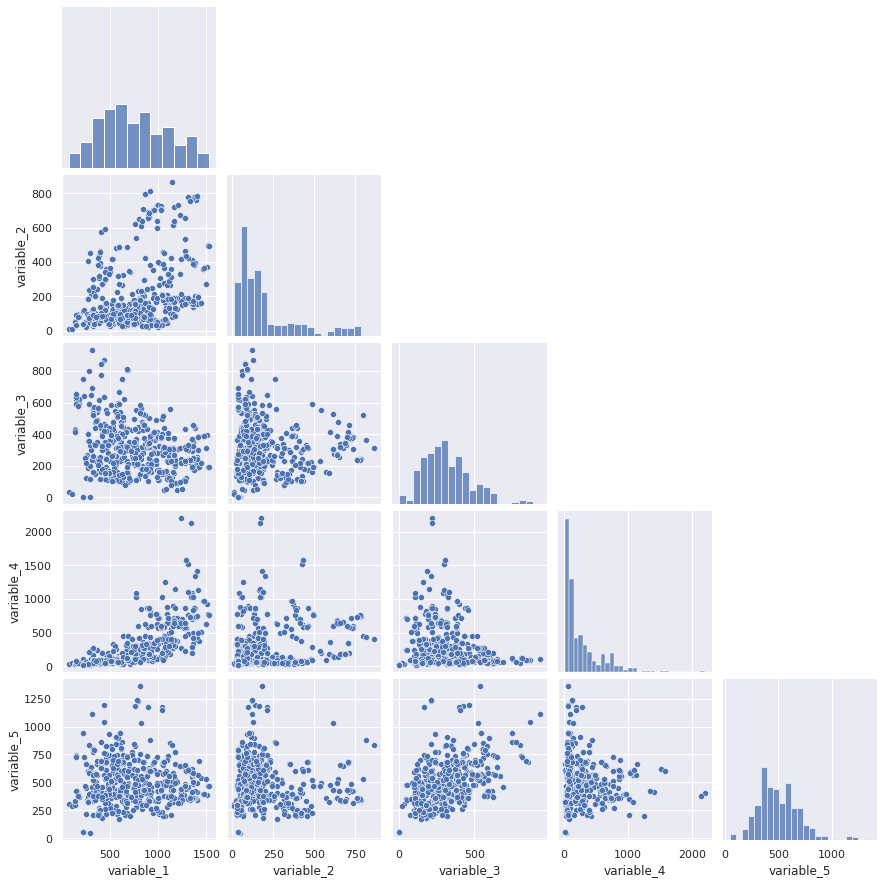

In [13]:
nb_features = 5
sns.pairplot(data=intensities,
             x_vars=intensities.iloc[:,:nb_features],
             y_vars=intensities.iloc[:,:nb_features],
             corner=True);

#### Some features seem to be normally distributed, some others are clearly not

#### On the pairplots, we could also observed some features linked by a linear relationship (here that is not the case but that could be for other features)

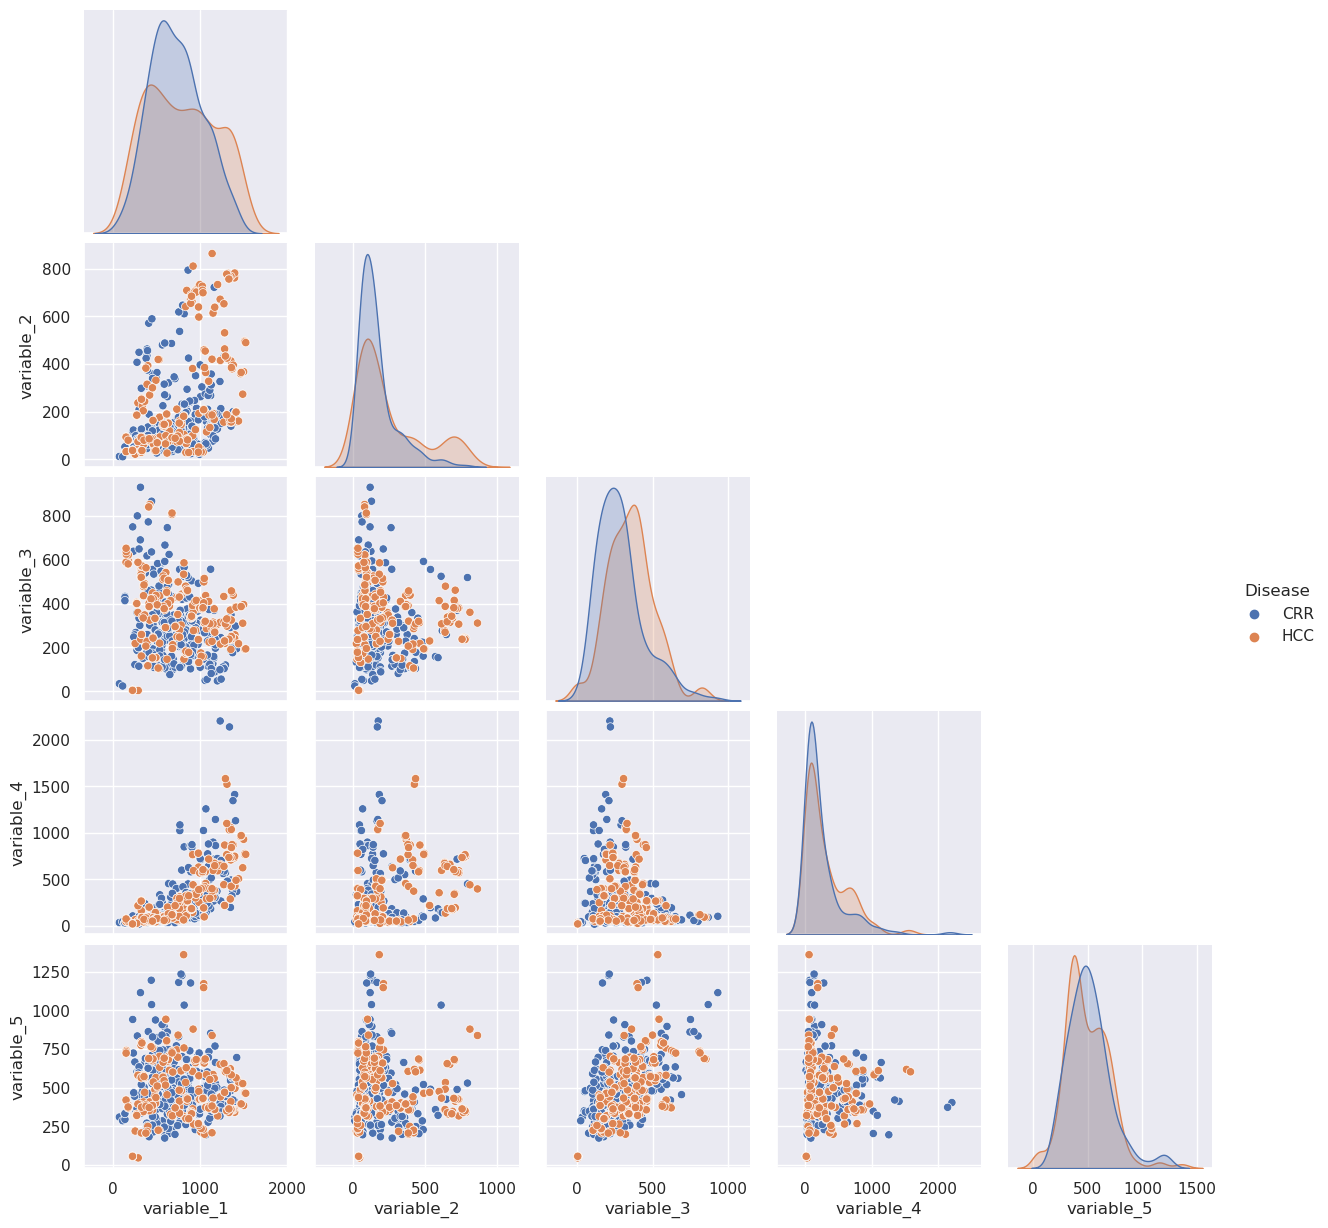

In [14]:
nb_features = 5
sns.pairplot(data=peakTable,
             hue=target.name,
             x_vars=peakTable[intensities.columns].iloc[:,:nb_features],
             y_vars=peakTable[intensities.columns].iloc[:,:nb_features],
             corner=True);

## b - Histograms

#### Here we can just plot the distributions of the first 4 features

#### The following two functions will be used later to show the impact of the normalisation/scaling methods on features and sample distributions

Function <code>plot_first_distributions_metabolites</code> plots histogram of the first 4 **features** distributions.

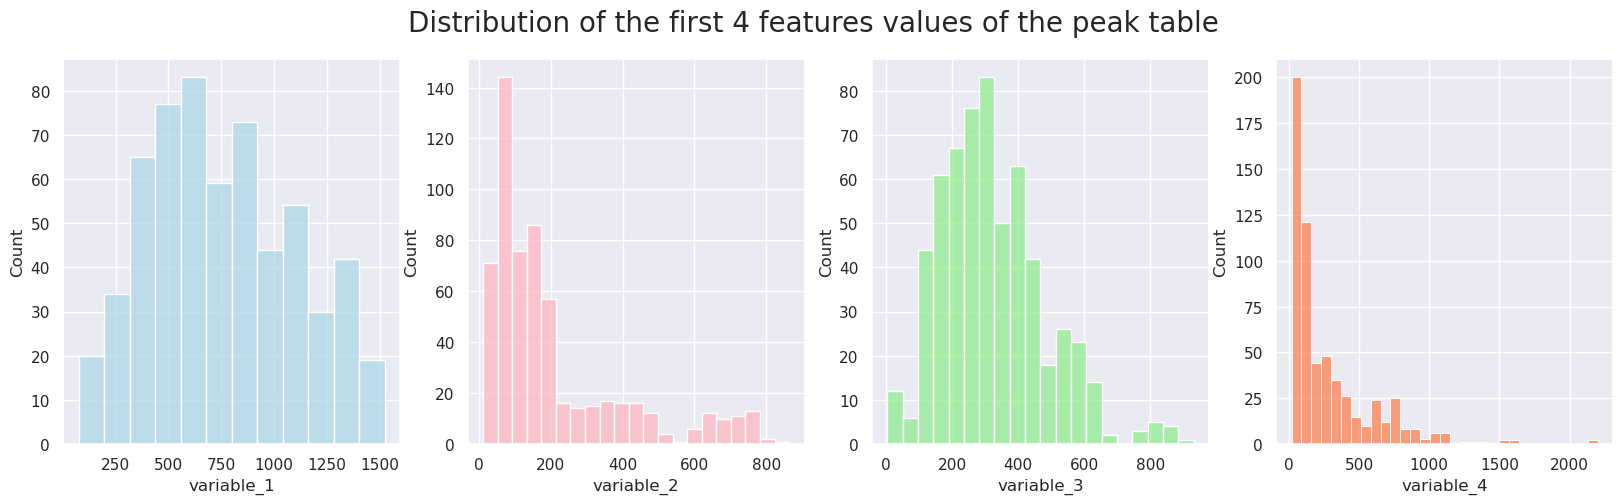

In [15]:
plot_first_distributions_metabolites(intensities)

Function <code>plot_first_distributions_samples</code> plots histogram of the first 4 **samples** distributions.

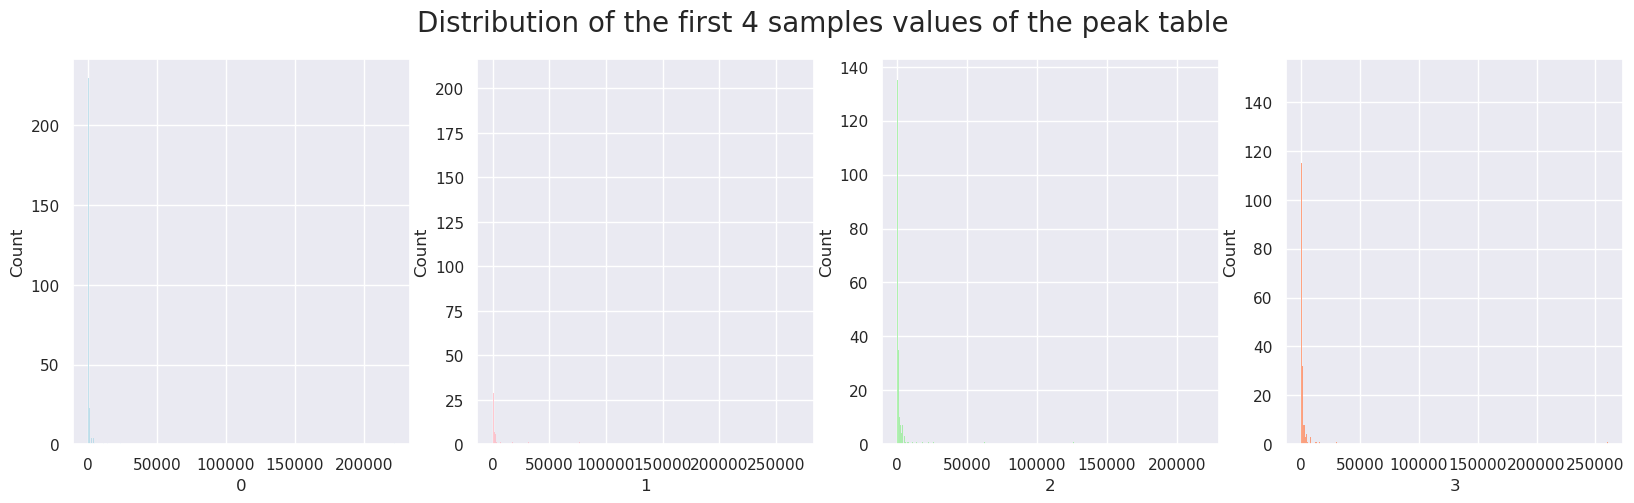

In [16]:
plot_first_distributions_samples(intensities)

We can see that the values can be in a different range according to the feature or the sample. For further analysis, it would be better to apply a few transformation on our peak table :
- a __transformation__ (for example apply $log_2$) on all values in the peak table (to approach normal distributions)
- a __scaling__ (for example with [StandardScaler of scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) on each feature to have a __mean value of 0 et a std of 1__
- a __normalisation__ (for example with [Normalizer of scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html?highlight=normalizer#sklearn.preprocessing.Normalizer)) on each samples to have a __vector norm equal to 1__

This will allow to compare with an equal weight (importance) all features and all samples.

## c - Boxplots

#### We can also observe the values taken by the features with the boxplot visualisation

Function <code>boxplot_first_distributions_metabolites</code> plots boxplots of the first features we want to observe (below for the first 20 features in the peak table).

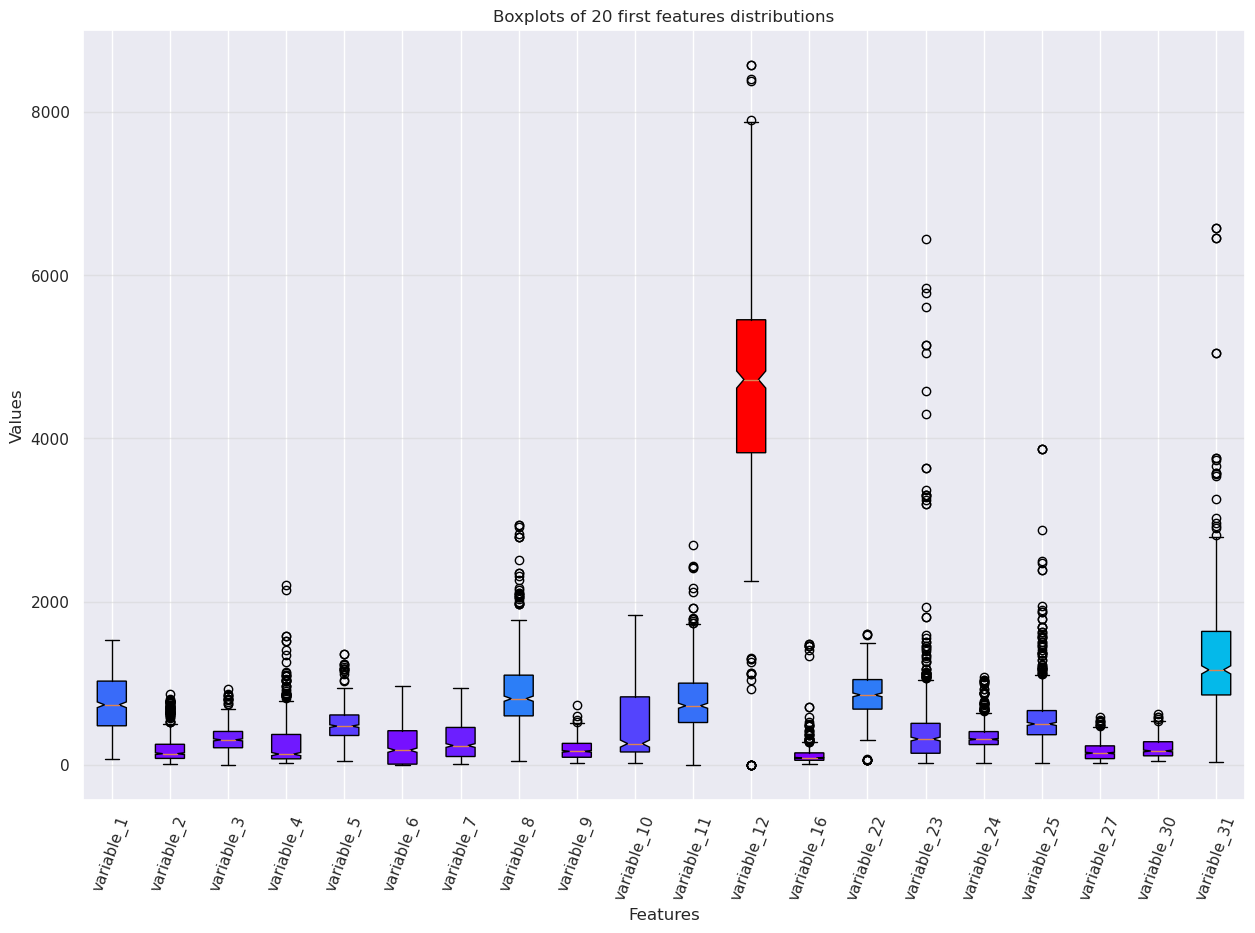

In [17]:
boxplot_first_distributions_metabolites(intensities, n=20)

Below the first 50 features of the peak table.

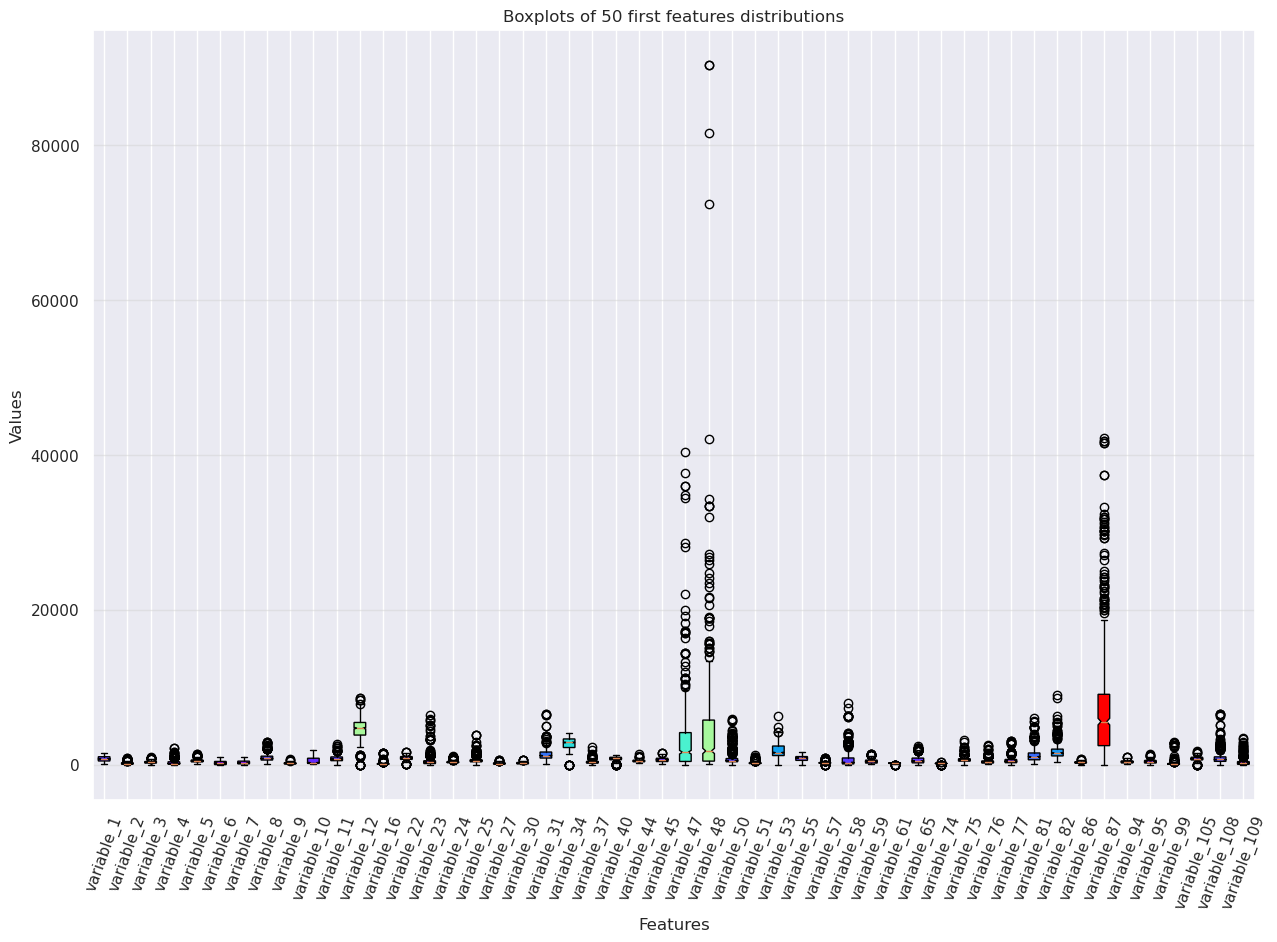

In [18]:
boxplot_first_distributions_metabolites(intensities, n=50)

#### We can clearly observe that features are not in the same range of values, and that there are many outliers.

We can also just pass the list of column names we want to visualise

In [19]:
# Randomly selects 8 features from the peak table
# We could also choose by hand which features we want to plot

n_features = 8

list_features = random.sample(intensities.columns.tolist(), n_features)
list_features

['variable_1197',
 'variable_109',
 'variable_189',
 'variable_233',
 'variable_467',
 'variable_1115',
 'variable_1070',
 'variable_878']

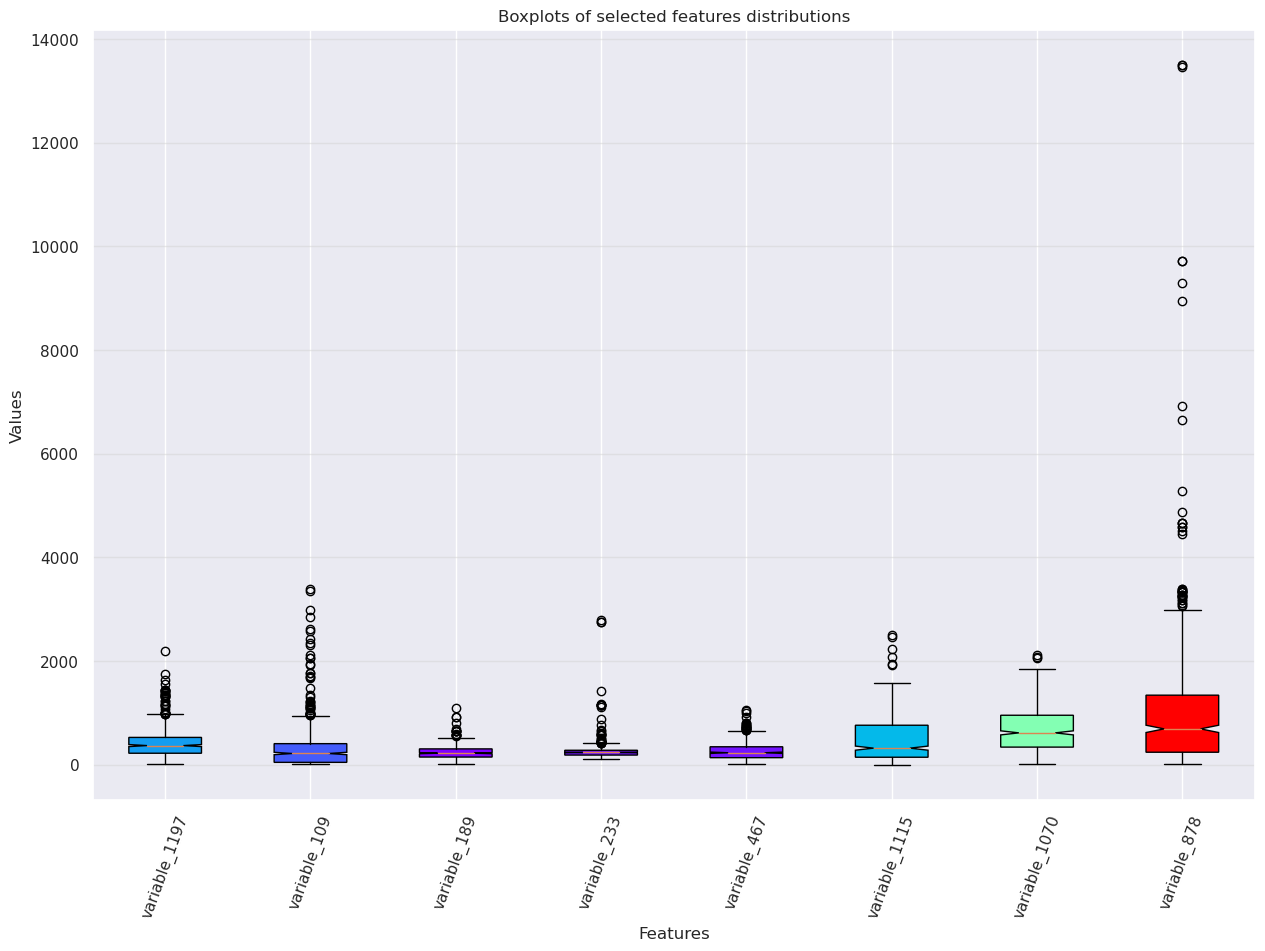

In [20]:
boxplot_first_distributions_metabolites(intensities, list_features=list_features)

# 2 - Transformation methods

### Each value in the peak table is transformed individually, based on a mathematical function

Inspired by [this link](https://www.statology.org/transform-data-in-python/), we can transform our data to make it more normally distributed, with one of the following methods, for each value $x_{ij}$ in the peak table :

<table>
  <tr>
    <th>Method</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>base-e log (natural log)</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = log_{e}(x_{ij})
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>base-2 log</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = log_{2}(x_{ij})
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>base-10 log</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = log_{10}(x_{ij})
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Square Root</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \sqrt{x_{ij}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Cubic Root</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \sqrt[3]{x_{ij}}
        \end{eqnarray}
    </td>
  </tr>
</table>

**Note** : Be careful not to have 0 in the peak table if you use log, log(0) is not defined.

## a - Based-e log

In [21]:
normPeakTable(intensities, 'loge', based='metabolite')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,5.428584,4.762277,6.620094,4.671414,6.847209,3.343154,3.834350,7.464331,4.696904,7.296136,...,10.057606,5.845559,0.967446,4.869794,2.953394,1.647564,5.115658,4.353928,2.155354,4.131198
1,6.376604,4.865308,6.387890,4.980099,6.798389,3.326549,4.299540,7.346687,4.526853,7.274989,...,9.881826,5.492404,0.683995,4.699889,1.541025,4.726745,5.195387,3.975396,4.773664,4.300991
2,5.706511,5.341394,6.475739,4.596645,6.453325,2.035595,5.355932,7.349610,6.129329,7.261494,...,8.249481,7.035909,5.709694,5.521857,5.247178,5.860308,5.682031,5.575658,5.877154,3.982121
3,6.352847,5.416489,6.374018,4.746753,6.443991,2.730231,4.550832,7.404660,5.965939,7.337849,...,8.268844,6.656041,5.743600,5.703197,5.584651,4.620374,5.823451,5.314658,5.236877,4.268196
4,5.461156,4.812681,6.459564,3.849633,6.584867,2.628708,4.447871,7.679519,6.184157,6.114377,...,5.997668,7.239836,5.311757,5.175909,5.065592,5.299745,6.645788,5.669564,6.245238,3.847145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,7.175779,5.232000,5.799469,7.003766,6.414188,6.595242,6.664403,6.689722,4.593741,5.649474,...,6.160797,5.869557,5.508915,5.173257,5.169421,5.804234,6.668990,2.992981,6.124338,4.020896
596,6.571827,4.484485,5.687502,5.381303,5.912973,5.532021,5.378935,6.135576,5.674382,3.901796,...,7.517489,6.252771,4.739233,4.419591,4.497886,5.735548,5.852314,4.429933,5.901390,3.833477
597,6.941424,6.550144,5.942687,6.403782,6.066876,5.734414,6.131327,6.788249,5.629289,7.282324,...,5.004951,6.555538,5.918621,5.656512,5.565925,5.862516,6.243219,4.713514,6.952389,4.579457
598,6.768536,3.365533,5.180382,5.779191,5.702369,6.130935,6.005424,5.808831,5.205959,4.028571,...,6.711850,5.961465,3.794926,3.912414,4.130188,6.146952,5.199195,2.594597,6.018290,3.512059


#### On the plot below, we can observe the boxplots for the number of features we select, before and after the transformation

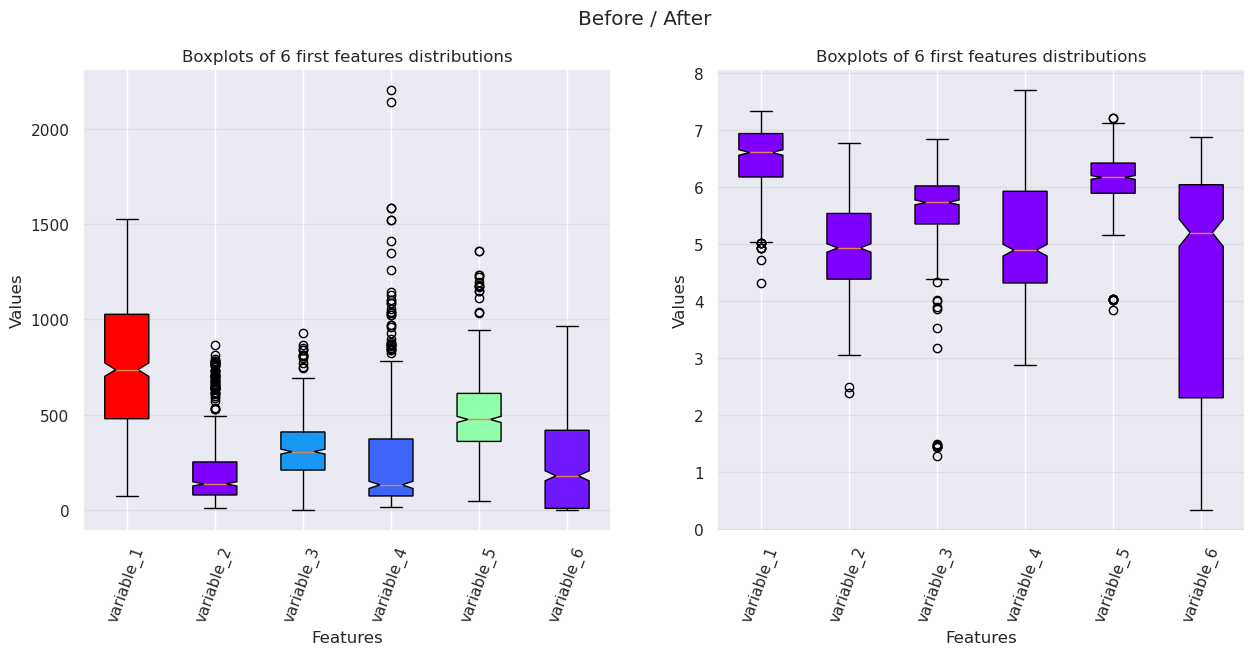

In [22]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'loge', based='metabolite'), n=6)

#### We can also pass a list of features we want to plot

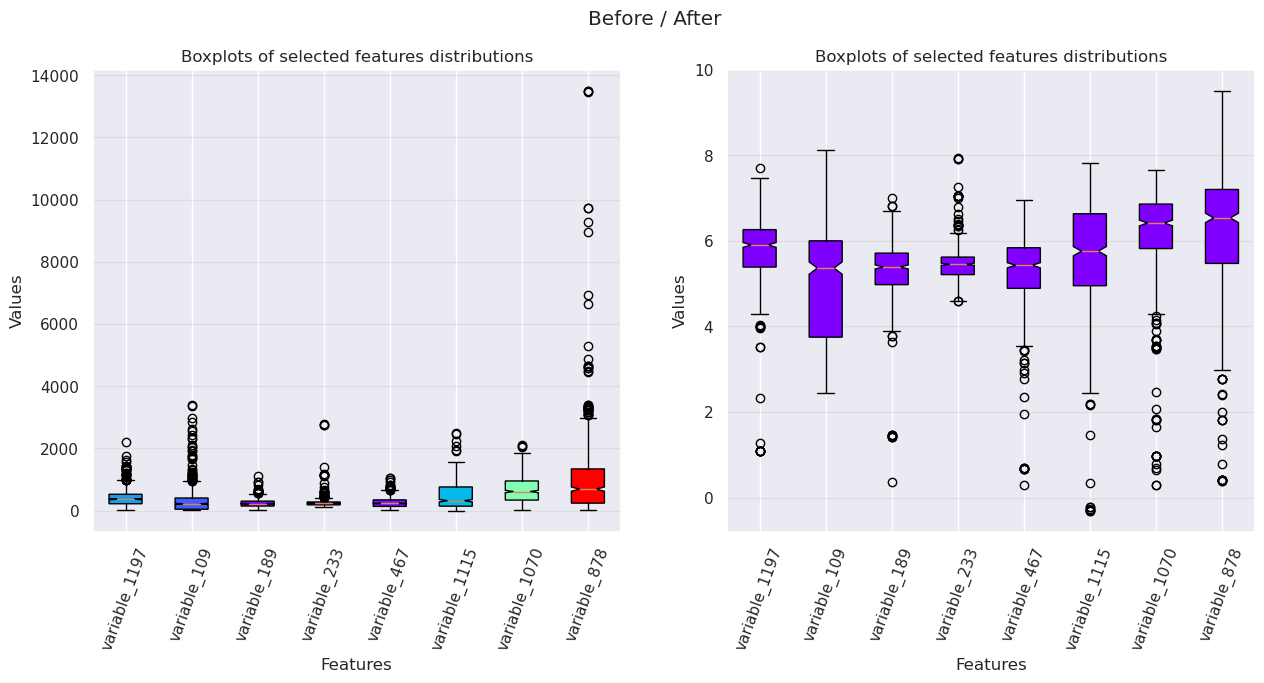

In [23]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'loge', based='metabolite'),
                                                     list_features=list_features)

## b - Based-2 log

In [24]:
normPeakTable(intensities, 'log2', based='metabolite')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,7.831792,6.870514,9.550776,6.739425,9.878435,4.823151,5.531798,10.768754,6.776200,10.526099,...,14.510059,8.433359,1.395729,7.025628,4.260847,2.376933,7.380335,6.281390,3.109519,5.960058
1,9.199495,7.019155,9.215777,7.184763,9.808002,4.799196,6.202925,10.599030,6.530868,10.495591,...,14.256461,7.923864,0.986796,6.780507,2.223230,6.819252,7.495359,5.735284,6.886941,6.205019
2,8.232755,7.706002,9.342516,6.631556,9.310180,2.936743,7.726976,10.603246,8.842753,10.476121,...,11.901486,10.150672,8.237347,7.966356,7.570077,8.454638,8.197438,8.043974,8.478941,5.744987
3,9.165220,7.814342,9.195764,6.848118,9.296714,3.938891,6.565463,10.682666,8.607031,10.586279,...,11.929420,9.602637,8.286264,8.227974,8.056948,6.665791,8.401463,7.667431,7.555217,6.157706
4,7.878782,6.943230,9.319181,5.553846,9.499954,3.792425,6.416921,11.079203,8.921853,8.821181,...,8.652806,10.444875,7.663245,7.467258,7.308104,7.645916,9.587845,8.179451,9.009974,5.550257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,10.352460,7.548180,8.366865,10.104298,9.253717,9.514923,9.614701,9.651228,6.627368,8.150469,...,8.888151,8.467980,7.947685,7.463433,7.457898,8.373739,9.621318,4.317959,8.835552,5.800927
596,9.481143,6.469744,8.205331,7.763579,8.530617,7.981019,7.760162,8.851765,8.186403,5.629101,...,10.845444,9.020841,6.837267,6.376122,6.489077,8.274646,8.443104,6.391042,8.513906,5.530539
597,10.014358,9.449861,8.573485,9.238705,8.752652,8.273010,8.845636,9.793374,8.121347,10.506173,...,7.220618,9.457642,8.538765,8.160621,8.029933,8.457823,9.007061,6.800164,10.030177,6.606759
598,9.764934,4.855438,7.473711,8.337610,8.226780,8.845069,8.663996,8.380372,7.510611,5.811999,...,9.683153,8.600576,5.474921,5.644420,5.958602,8.868177,7.500852,3.743213,8.682557,5.066831


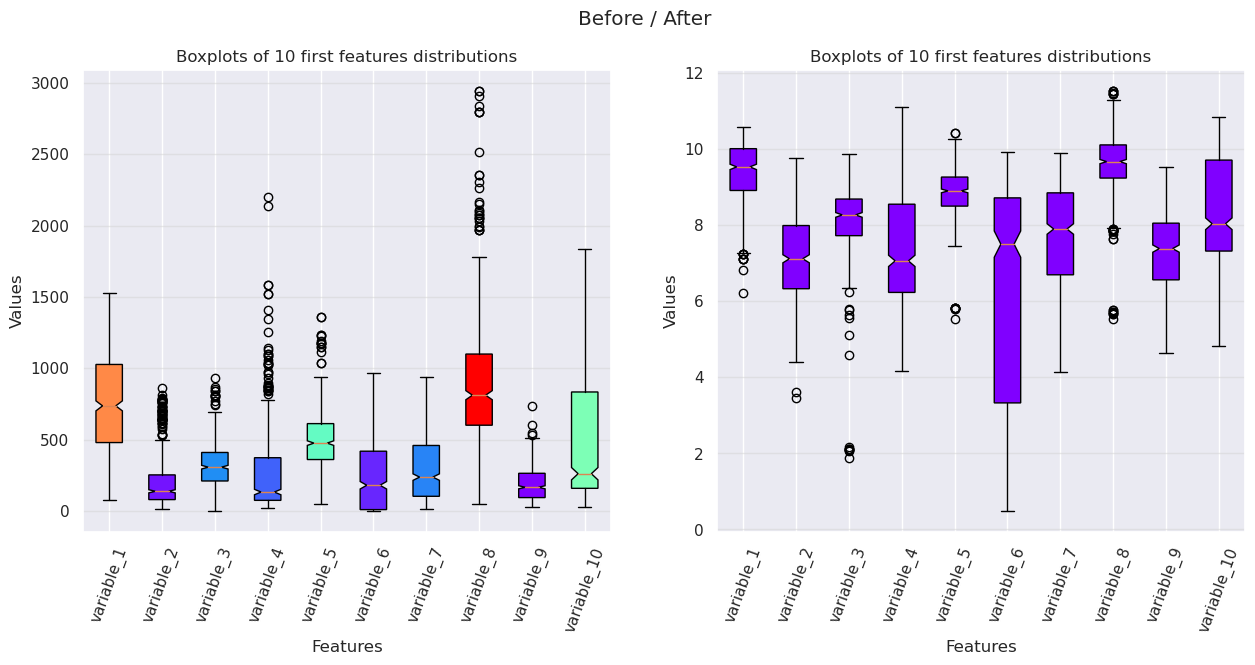

In [25]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'log2', based='metabolite')) # default number of displayed features is 10

## c - Based-10 log

In [26]:
normPeakTable(intensities, 'log10', based='metabolite')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,2.357604,2.068231,2.875070,2.028769,2.973705,1.451913,1.665237,3.241718,2.039839,3.168671,...,4.367963,2.538694,0.420156,2.114925,1.282643,0.715528,2.221702,1.890887,0.936058,1.794156
1,2.769324,2.112976,2.774225,2.162829,2.952503,1.444702,1.867266,3.190626,1.965987,3.159488,...,4.291622,2.385321,0.297055,2.041136,0.669259,2.052799,2.256328,1.726493,2.073176,1.867897
2,2.478306,2.319738,2.812378,1.996297,2.802643,0.884048,2.326052,3.191895,2.661934,3.153627,...,3.582704,3.055657,2.479688,2.398112,2.278820,2.545100,2.467675,2.421477,2.552416,1.729413
3,2.759006,2.352351,2.768201,2.061489,2.798590,1.185724,1.976401,3.215803,2.590974,3.186787,...,3.591113,2.890682,2.494414,2.476867,2.425383,2.006603,2.529092,2.308127,2.274347,1.853654
4,2.371750,2.090121,2.805353,1.671874,2.859771,1.141634,1.931686,3.335173,2.685745,2.655440,...,2.604754,3.144221,2.306867,2.247869,2.199958,2.301650,2.886229,2.462260,2.712272,1.670794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3.116401,2.272229,2.518677,3.041697,2.785647,2.864277,2.894313,2.905309,1.995037,2.453536,...,2.675600,2.549116,2.392491,2.246717,2.245051,2.520747,2.896305,1.299835,2.659766,1.746253
596,2.854108,1.947587,2.470051,2.337070,2.567972,2.402526,2.336042,2.664647,2.464353,1.694528,...,3.264804,2.715544,2.058223,1.919404,1.953407,2.490917,2.541628,1.923895,2.562941,1.664858
597,3.014622,2.844692,2.580876,2.781127,2.634811,2.490424,2.662802,2.948099,2.444769,3.162673,...,2.173623,2.847034,2.570424,2.456592,2.417251,2.546058,2.711396,2.047053,3.019384,1.988833
598,2.939538,1.461632,2.249811,2.509871,2.476508,2.662631,2.608123,2.522743,2.260919,1.749586,...,2.914920,2.589031,1.648115,1.699140,1.793718,2.669587,2.257982,1.126819,2.613710,1.525268


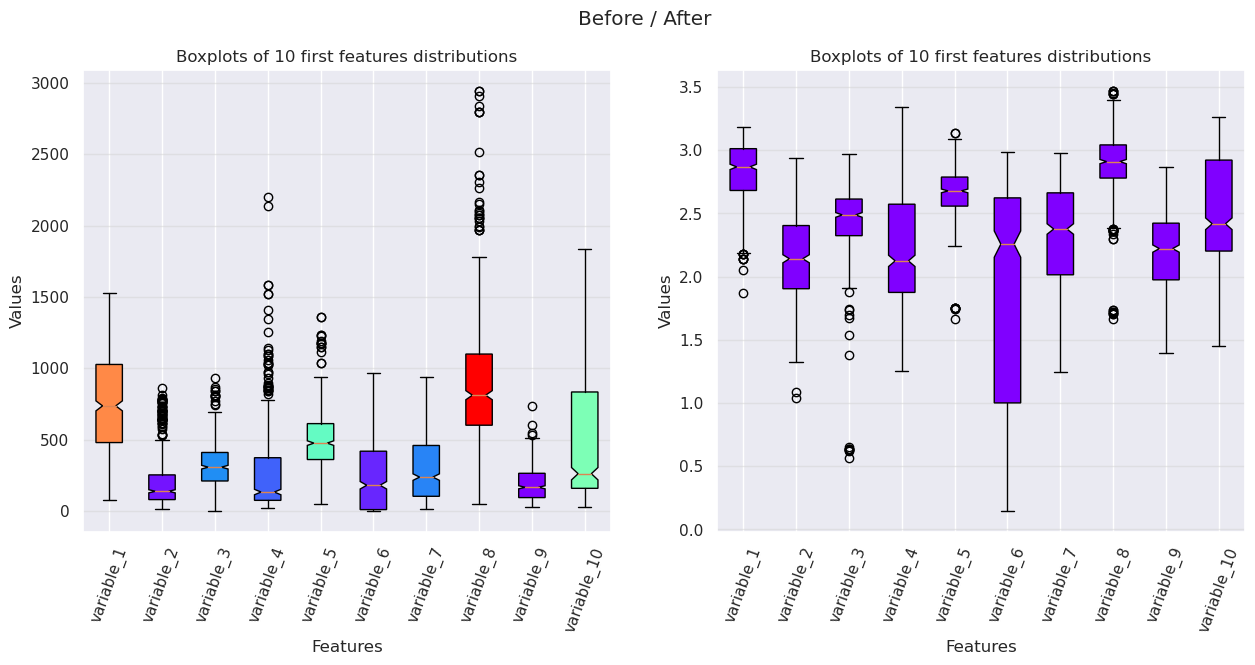

In [27]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'log10', based='metabolite'))

## d - Square root

In [28]:
normPeakTable(intensities, 'sqrt', based='metabolite')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,15.093923,10.817212,27.386407,10.336764,30.679802,5.320550,6.801718,41.769472,10.469350,38.400397,...,152.750085,18.592893,1.622102,11.414644,4.378460,2.279103,12.907765,8.819490,2.937847,7.890021
1,24.247219,11.389067,24.384435,12.061870,29.939971,5.276561,8.582883,39.383373,9.615981,37.996526,...,139.897899,15.583335,1.407757,10.484990,2.160874,10.626730,13.432718,7.298713,10.878972,8.589114
2,17.344153,14.450036,25.479375,9.957463,25.195425,2.767094,14.555455,39.440968,21.427272,37.740994,...,61.851761,33.715399,17.371777,15.814521,13.785106,18.730518,17.133156,16.245712,18.888951,7.323298
3,23.960900,15.002918,24.215889,10.733575,25.078113,3.916175,9.731969,40.541653,19.746369,39.209718,...,62.453468,27.883089,17.668796,17.315437,16.318923,10.076310,18.388497,14.258158,13.714295,8.449424
4,15.341749,11.093288,25.274148,6.853891,26.908259,3.722346,9.243637,46.514276,22.022809,21.267675,...,20.062133,37.334497,14.237488,13.302534,12.588652,14.152233,27.740509,17.026685,22.705765,6.845371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,36.157679,13.680889,18.169319,33.177860,24.707184,27.048213,27.999917,28.356630,9.943019,16.856514,...,21.767071,18.817332,15.712516,13.284907,13.259452,18.212659,28.064201,4.465988,21.373870,7.466662
596,26.733400,9.414419,17.180089,14.741274,19.230289,15.895091,14.723830,21.494301,17.067756,7.035001,...,42.894536,22.791448,10.693288,9.113853,9.477711,17.597800,18.655798,9.161103,19.119234,6.798749
597,32.159635,26.445136,19.518122,24.578968,20.768516,17.587824,21.448693,29.788568,16.687243,38.136132,...,12.212691,26.516546,19.284671,16.915930,16.166847,18.751207,22.682857,10.556663,32.336431,9.872255
598,29.496398,5.380420,13.332317,17.986034,17.308275,21.444480,20.140087,18.254571,13.503912,7.495368,...,28.672118,19.702245,6.668954,7.072449,7.886039,21.616908,13.458317,3.659398,20.270063,5.789406


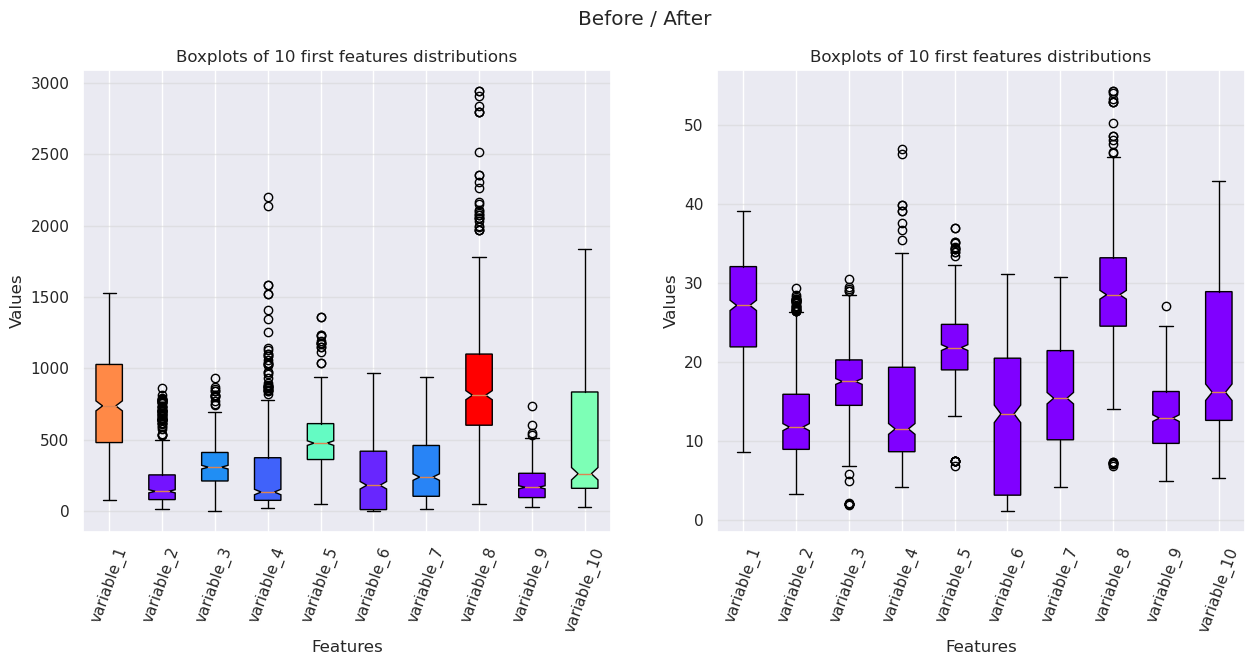

In [29]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'sqrt', based='metabolite'))

## e - Cubic root

In [30]:
normPeakTable(intensities, 'cbrt', based='metabolite')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,6.107565,4.891142,9.085665,4.745221,9.800202,3.047692,3.589873,12.038508,4.785711,11.382137,...,28.575092,7.018290,1.380550,5.069614,2.676379,1.731846,5.502593,4.268700,2.051254,3.963256
1,8.377375,5.062038,8.408951,5.259484,9.642010,3.030870,4.192008,11.575558,4.521985,11.302190,...,26.948885,6.238884,1.256083,4.790476,1.671423,4.833553,5.650791,3.762682,4.909741,4.194037
2,6.700420,5.932612,8.658829,4.628417,8.594378,1.970982,5.961431,11.586841,7.714562,11.251460,...,15.639927,10.436436,6.707533,6.300437,5.749191,7.052881,6.645968,6.414446,7.092596,3.771127
3,8.311296,6.082991,8.370157,4.865897,8.567680,2.484514,4.558274,11.801421,7.305638,11.541506,...,15.741195,9.195188,6.783773,6.693023,6.433703,4.665172,6.966759,5.879977,5.729486,4.148439
4,6.174236,4.974012,8.612271,3.608207,8.979602,2.401842,4.404486,12.933741,7.856850,7.676207,...,7.383315,11.170524,5.874293,5.614222,5.411523,5.850819,9.163814,6.618406,8.018456,3.605216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,10.934536,5.720178,6.911290,10.325210,8.482988,9.010711,9.220854,9.299004,4.623940,6.574234,...,7.795907,7.074657,6.273316,5.609262,5.602094,6.922276,9.234962,2.711929,7.701739,3.820185
596,8.940658,4.458571,6.658099,6.012060,7.177787,6.321818,6.007317,7.730642,6.629045,3.671494,...,12.253721,8.038616,4.853714,4.363162,4.478532,6.765589,7.034111,4.378229,7.150125,3.588828
597,10.112862,8.876271,7.249232,8.453614,7.555623,6.763032,7.719702,9.609477,6.530149,11.329857,...,5.303235,8.892243,7.191313,6.589674,6.393670,7.058073,8.013062,4.812282,10.149891,4.601975
598,9.546540,3.070512,5.622599,6.864732,6.691177,7.718691,7.402429,6.932892,5.670740,3.829970,...,9.367848,7.294751,3.543005,3.684511,3.961922,7.760012,5.657968,2.374687,7.434243,3.224205


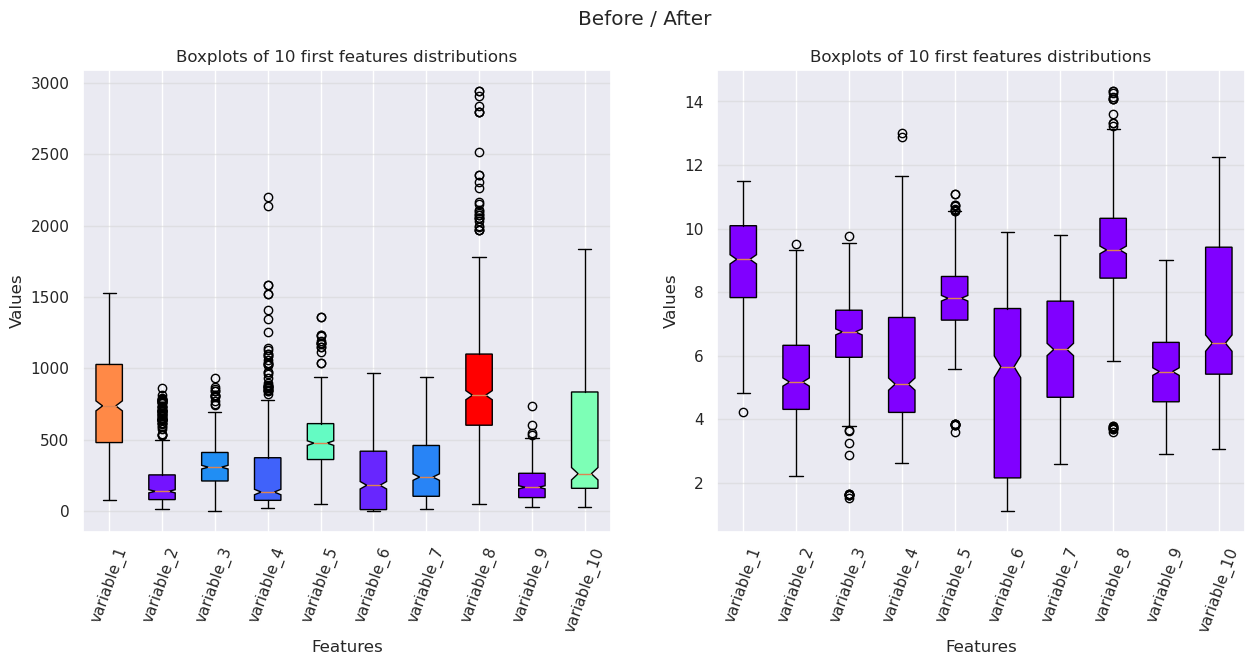

In [31]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'cbrt', based='metabolite'))

### Conclusion : For the transformation methods, each value in the peak table is changed with the same mathematical method.

# 3 - Metabolite-based Scaling Methods

### Each value in the peak table is transformed based on other values in the same column (feature/metabolite-based)

At this point, we want to __scale__ our peak table based on metabolite values

*Reminder : peak table of dimension $(n,p)$, rows = samples with iterator $i$, columns = features (metabolites) with iterator $j$*

Inspired by [this course](https://www.uab.edu/proteomics/metabolomics/workshop/2014/statistical%20analysis.pdf) and [this paper (NOREVA)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5570188/), here are all the Metabolite-based Normalization Methods available in this notebook :

<table>
  <tr>
    <th>Method</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>Range scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{x_{j_{max}} - x_{j_{min}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Min-max scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - x_{j_{min}}}{x_{j_{max}} - x_{j_{min}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Maximum absolute scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij}}{x_{j_{max}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Level scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\bar{x}_j}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Robust scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - Q_2(x_j)}{Q_3(x_j) - Q_1(x_j)}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Autoscaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Pareto scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\sqrt{s_j}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Vast scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j} \cdot \frac{\bar{x}_j}{s_j}
        \end{eqnarray}
    </td>
  </tr>
</table>

## a - Range scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{x_{j_{max}} - x_{j_{min}}}
\end{eqnarray}

In [32]:
normPeakTable(intensities, 'range_scaling', based='metabolites')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,0.105519,0.124338,0.805091,0.040719,0.681230,0.027920,0.030951,0.586044,0.119525,0.799472,...,1.000000,0.141523,0.005271,0.431122,0.068309,0.005997,0.148281,0.170016,0.000000,0.545113
1,0.353864,0.139228,0.637449,0.058405,0.647086,0.027437,0.060580,0.519228,0.095318,0.782414,...,0.838783,0.099153,0.003522,0.363414,0.014753,0.178311,0.160636,0.114553,0.088154,0.687142
2,0.155859,0.231971,0.696342,0.037196,0.447931,0.006489,0.210004,0.520795,0.613142,0.771715,...,0.163865,0.467381,0.811112,0.829559,0.699301,0.558828,0.261693,0.591186,0.279724,0.438820
3,0.344344,0.251065,0.628613,0.044546,0.443441,0.014459,0.083335,0.551172,0.515400,0.834197,...,0.167071,0.319387,0.839148,0.994930,0.981001,0.160085,0.301533,0.454006,0.144177,0.657799
4,0.110721,0.131430,0.685107,0.013314,0.515875,0.012922,0.073316,0.730583,0.649686,0.234312,...,0.017137,0.573306,0.544231,0.586311,0.582766,0.318036,0.686971,0.649981,0.407277,0.355337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.850034,0.206600,0.352165,0.495654,0.429382,0.757782,0.828627,0.261490,0.104352,0.141339,...,0.020194,0.144982,0.663235,0.584752,0.646799,0.528229,0.703110,0.039147,0.360108,0.464961
596,0.441275,0.091059,0.314446,0.091277,0.246177,0.260740,0.215335,0.143450,0.376135,0.011613,...,0.078751,0.213099,0.306208,0.274043,0.329247,0.493011,0.310381,0.183914,0.286757,0.347495
597,0.661666,0.807171,0.406997,0.268331,0.293019,0.319558,0.478356,0.290220,0.357996,0.788290,...,0.006278,0.288763,1.000000,0.949449,0.962756,0.560069,0.459118,0.246176,0.833171,0.979186
598,0.548421,0.021076,0.187804,0.139883,0.192711,0.475778,0.419510,0.099016,0.222265,0.015311,...,0.035123,0.159023,0.117989,0.164152,0.227180,0.745098,0.161251,0.024318,0.323176,0.190852


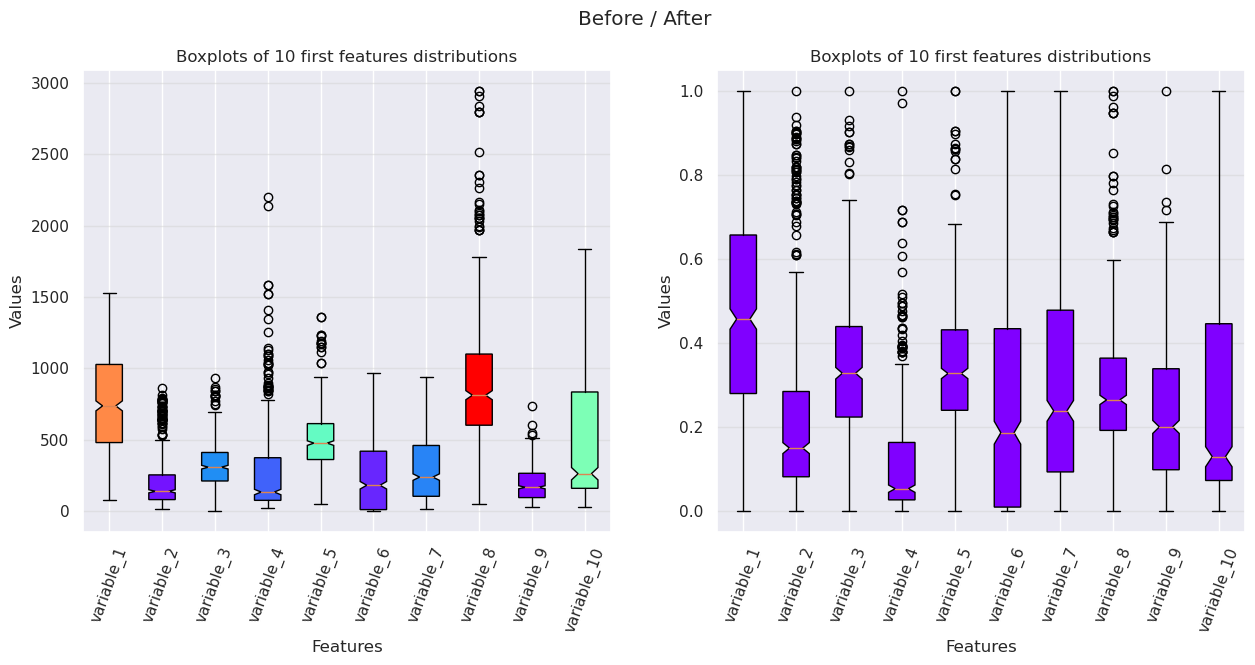

In [33]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'range_scaling', based='metabolite'))

## b - Mini-max scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - x_{j_{min}}}{x_{j_{max}} - x_{j_{min}}}
\end{eqnarray}

_Use <code>MinMaxScaler()</code> function from <code>scikitlearn</code> package_

In [34]:
normPeakTable(intensities, 'minmax_scaling', based='metabolites')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,0.105519,0.124338,0.805091,0.040719,0.681230,0.027920,0.030951,0.586044,0.119525,0.799472,...,1.000000,0.141523,0.005271,0.431122,0.068309,0.005997,0.148281,0.170016,0.000000,0.545113
1,0.353864,0.139228,0.637449,0.058405,0.647086,0.027437,0.060580,0.519228,0.095318,0.782414,...,0.838783,0.099153,0.003522,0.363414,0.014753,0.178311,0.160636,0.114553,0.088154,0.687142
2,0.155859,0.231971,0.696342,0.037196,0.447931,0.006489,0.210004,0.520795,0.613142,0.771715,...,0.163865,0.467381,0.811112,0.829559,0.699301,0.558828,0.261693,0.591186,0.279724,0.438820
3,0.344344,0.251065,0.628613,0.044546,0.443441,0.014459,0.083335,0.551172,0.515400,0.834197,...,0.167071,0.319387,0.839148,0.994930,0.981001,0.160085,0.301533,0.454006,0.144177,0.657799
4,0.110721,0.131430,0.685107,0.013314,0.515875,0.012922,0.073316,0.730583,0.649686,0.234312,...,0.017137,0.573306,0.544231,0.586311,0.582766,0.318036,0.686971,0.649981,0.407277,0.355337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.850034,0.206600,0.352165,0.495654,0.429382,0.757782,0.828627,0.261490,0.104352,0.141339,...,0.020194,0.144982,0.663235,0.584752,0.646799,0.528229,0.703110,0.039147,0.360108,0.464961
596,0.441275,0.091059,0.314446,0.091277,0.246177,0.260740,0.215335,0.143450,0.376135,0.011613,...,0.078751,0.213099,0.306208,0.274043,0.329247,0.493011,0.310381,0.183914,0.286757,0.347495
597,0.661666,0.807171,0.406997,0.268331,0.293019,0.319558,0.478356,0.290220,0.357996,0.788290,...,0.006278,0.288763,1.000000,0.949449,0.962756,0.560069,0.459118,0.246176,0.833171,0.979186
598,0.548421,0.021076,0.187804,0.139883,0.192711,0.475778,0.419510,0.099016,0.222265,0.015311,...,0.035123,0.159023,0.117989,0.164152,0.227180,0.745098,0.161251,0.024318,0.323176,0.190852


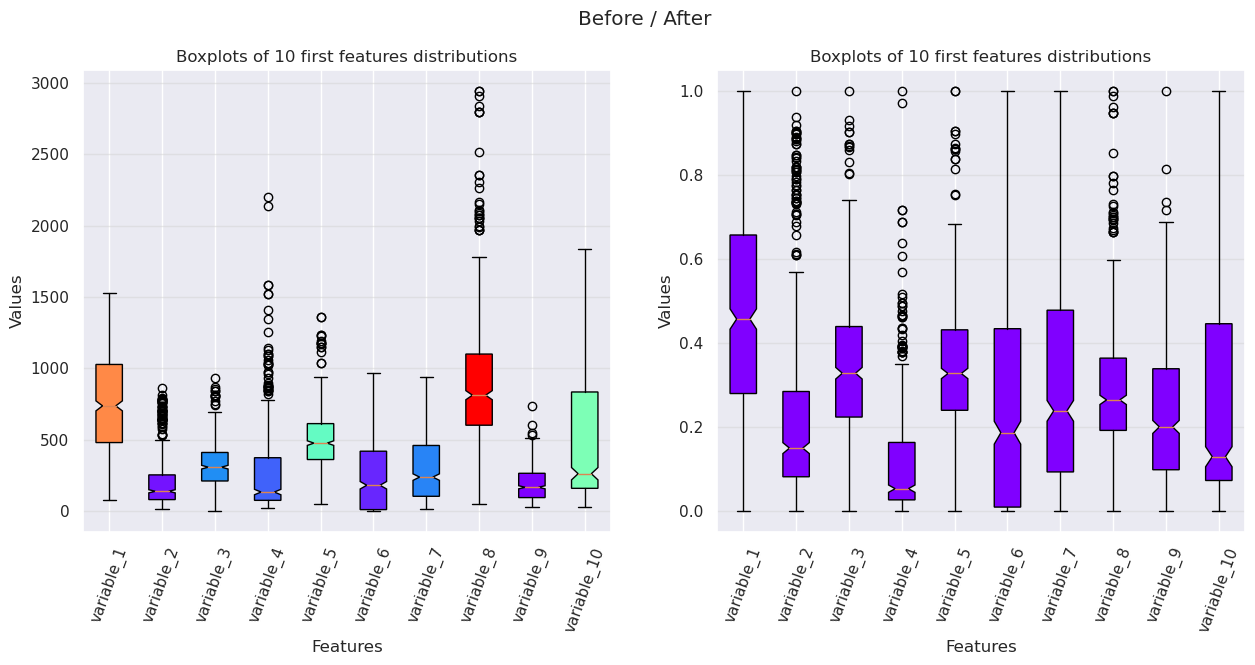

In [35]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'minmax_scaling', based='metabolite'))

## c - Maximum absolute scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij}}{x_{j_{max}}}
\end{eqnarray}

In [36]:
normPeakTable(intensities, 'max_abs_scaling', based='metabolites')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,0.149411,0.135463,0.805854,0.048509,0.692118,0.029335,0.049086,0.592549,0.149521,0.802581,...,1.000000,0.142280,0.007075,0.432370,0.070624,0.008289,0.148774,0.174951,0.006887,0.627863
1,0.385570,0.150164,0.638868,0.066052,0.659140,0.028852,0.078161,0.526784,0.126139,0.785788,...,0.838802,0.099947,0.005329,0.364810,0.017201,0.180205,0.161121,0.119818,0.094433,0.744055
2,0.197281,0.241729,0.697531,0.045015,0.466786,0.007934,0.224789,0.528326,0.626322,0.775254,...,0.163961,0.467851,0.811454,0.829932,0.700048,0.559845,0.262119,0.593617,0.284685,0.540906
3,0.376517,0.260580,0.630067,0.052305,0.462450,0.015893,0.100490,0.558225,0.531910,0.836768,...,0.167167,0.319987,0.839440,0.994941,0.981048,0.162021,0.301937,0.457252,0.150071,0.720050
4,0.154358,0.142466,0.686340,0.021327,0.532410,0.014358,0.090659,0.734817,0.661621,0.246183,...,0.017250,0.573682,0.545057,0.587218,0.583802,0.319609,0.687152,0.652062,0.411359,0.472609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.857393,0.216680,0.354702,0.499750,0.448871,0.758135,0.831835,0.273096,0.134865,0.154651,...,0.020307,0.145736,0.663845,0.585663,0.647677,0.529316,0.703282,0.044860,0.364514,0.562291
596,0.468692,0.102607,0.317130,0.098657,0.271923,0.261815,0.230020,0.156911,0.397390,0.026937,...,0.078857,0.213794,0.307467,0.275635,0.330913,0.494180,0.310779,0.188766,0.291668,0.466194
597,0.678268,0.809621,0.409319,0.274273,0.317165,0.320548,0.488118,0.301374,0.379868,0.791573,...,0.006392,0.289391,1.000000,0.949560,0.962849,0.561083,0.459430,0.250658,0.834320,0.982972
598,0.570580,0.033514,0.190984,0.146868,0.220284,0.476541,0.430374,0.113175,0.248761,0.030578,...,0.035234,0.159765,0.119589,0.165986,0.229100,0.745685,0.161736,0.030120,0.327838,0.338047


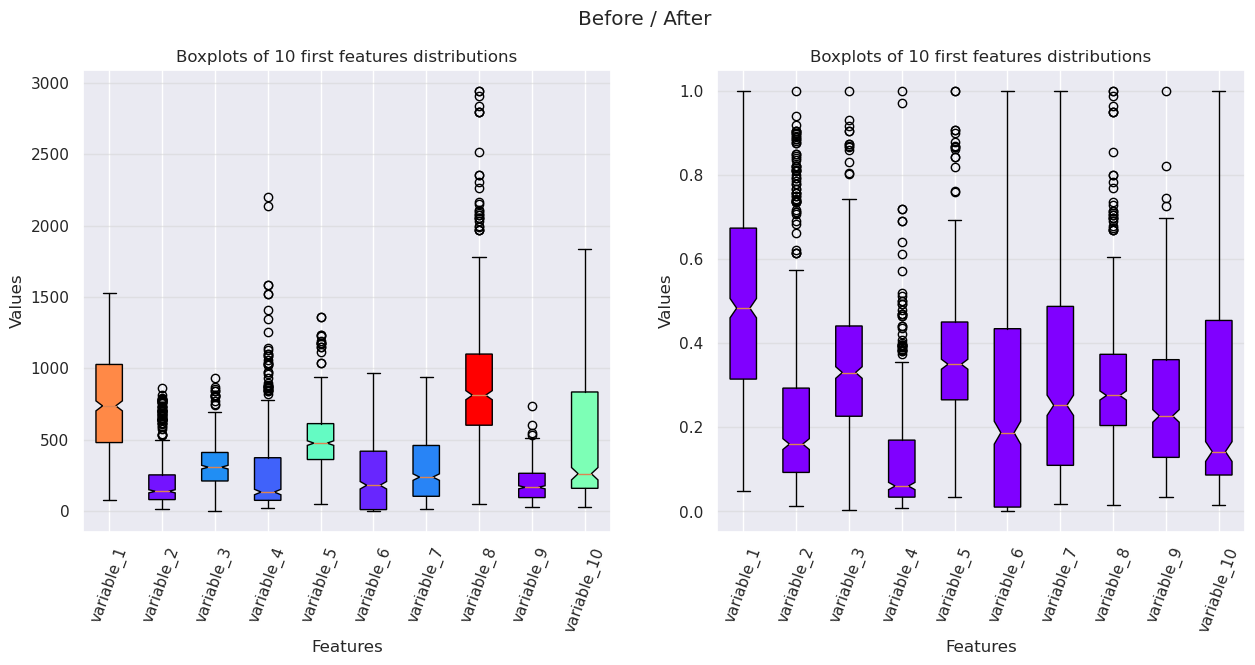

In [37]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'max_abs_scaling', based='metabolite'))

## d - Level scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\bar{x}_j}
\end{eqnarray}

In [38]:
normPeakTable(intensities, 'level_scaling', based='metabolites')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,-0.699824,-0.436419,1.335517,-0.618283,0.875349,-0.874730,-0.851366,0.974351,-0.425544,1.762667,...,12.939046,-0.389768,-0.985383,-0.005917,-0.850119,-0.975623,-0.628367,-0.203849,-0.980718,0.160743
1,-0.225367,-0.375256,0.851562,-0.480242,0.785993,-0.876793,-0.763328,0.755222,-0.515377,1.704861,...,10.692100,-0.571331,-0.988991,-0.161247,-0.963494,-0.470035,-0.597524,-0.454743,-0.735593,0.375550
2,-0.603651,0.005689,1.021578,-0.645783,0.264795,-0.966117,-0.319336,0.760360,1.406307,1.668602,...,1.285463,1.006586,0.676456,0.908139,0.485677,0.646447,-0.345233,1.701383,-0.202900,-0.000016
3,-0.243553,0.084120,0.826055,-0.588414,0.253045,-0.932133,-0.695713,0.859984,1.043580,1.880345,...,1.330147,0.372407,0.734274,1.287519,1.082031,-0.523513,-0.245769,1.080825,-0.579811,0.331171
4,-0.689886,-0.407284,0.989143,-0.832179,0.442607,-0.938685,-0.725484,1.448380,1.541924,-0.152583,...,-0.759550,1.460491,0.126083,0.350102,0.238975,-0.060064,0.716488,1.967351,0.151780,-0.126277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.722555,-0.098523,0.027993,2.932499,0.216251,2.237500,1.518807,-0.090054,-0.481852,-0.467656,...,-0.716945,-0.374946,0.371498,0.346526,0.374533,0.556664,0.756780,-0.795853,0.020619,0.039520
596,-0.058370,-0.573113,-0.080898,-0.223678,-0.263202,0.118043,-0.303497,-0.477179,0.526757,-0.907277,...,0.099193,-0.083051,-0.364777,-0.366274,-0.297719,0.453332,-0.223682,-0.140978,-0.183346,-0.138138
597,0.362681,2.368353,0.186285,1.158237,-0.140615,0.368853,0.478029,0.004166,0.459441,1.724773,...,-0.910897,0.241181,1.065990,1.183180,1.043407,0.650086,0.147645,0.140675,1.336047,0.817241
598,0.146331,-0.860569,-0.446492,0.155694,-0.403124,1.034996,0.303179,-0.622906,-0.044267,-0.894745,...,-0.508878,-0.314776,-0.752931,-0.618374,-0.513792,1.192984,-0.595989,-0.862935,-0.082074,-0.375046


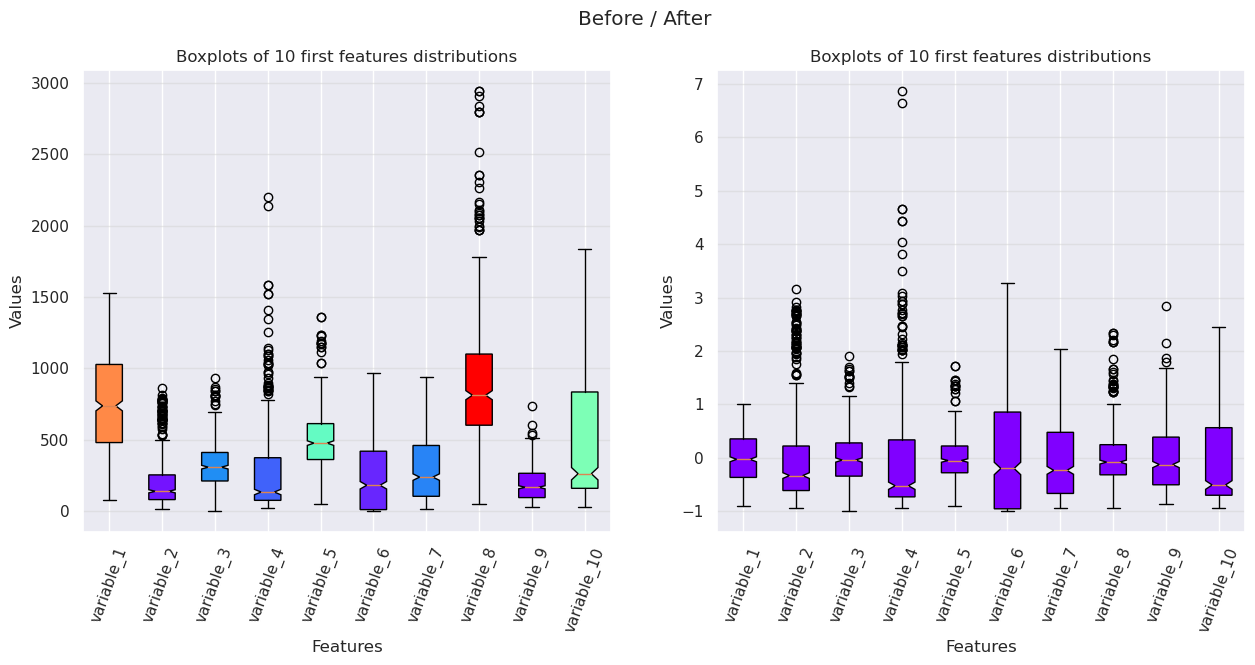

In [39]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'level_scaling', based='metabolite'))

## e - Robust scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - Q_2(x_j)}{Q_3(x_j) - Q_1(x_j)}
\end{eqnarray}

_Use <code>RobustScaler()</code> function from <code>scikitlearn</code> package_

In [40]:
normPeakTable(intensities, 'robust_scaling', based='metabolites')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,-0.930228,-0.123196,2.215333,-0.087977,1.848731,-0.372234,-0.537932,1.870935,-0.333829,1.796637,...,14.875333,-0.384448,-1.743914,-0.005188,-1.132108,-0.923830,-1.081597,-0.080285,-2.134198,0.526791
1,-0.272313,-0.049859,1.437394,0.041384,1.670523,-0.373373,-0.460993,1.482594,-0.434478,1.750937,...,12.383759,-0.631359,-1.750131,-0.186018,-1.281574,-0.409626,-1.023710,-0.392291,-1.563841,1.101830
2,-0.796868,0.406914,1.710687,-0.113748,0.631065,-0.422692,-0.072979,1.491699,1.718584,1.722273,...,1.953007,1.514473,1.119871,1.058928,0.628909,0.725881,-0.550200,2.289015,-0.324368,0.096440
3,-0.297532,0.500957,1.396391,-0.059986,0.607630,-0.403929,-0.401904,1.668254,1.312183,1.889668,...,2.002555,0.652044,1.219506,1.500592,1.415099,-0.464016,-0.363522,1.517304,-1.201368,0.983027
4,-0.916447,-0.088262,1.658549,-0.288423,0.985687,-0.407546,-0.427921,2.711012,1.870530,0.282518,...,-0.314650,2.131745,0.171434,0.409279,0.303675,0.007330,1.442481,2.619766,0.500902,-0.241561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.042142,0.281958,0.113538,3.239536,0.534251,1.346152,1.533415,-0.015409,-0.396917,0.033435,...,-0.267407,-0.364293,0.594348,0.405117,0.482385,0.634568,1.518102,-0.816487,0.195715,0.202277
596,-0.040743,-0.287100,-0.061501,0.281816,-0.421955,0.175916,-0.059137,-0.701474,0.733133,-0.314112,...,0.637586,0.032660,-0.674447,-0.424704,-0.403864,0.529475,-0.322068,-0.002101,-0.278870,-0.273313
597,0.543116,3.239869,0.367986,1.576838,-0.177472,0.314398,0.623856,0.151569,0.657711,1.766680,...,-0.482474,0.473588,1.791140,1.379123,1.364180,0.729582,0.374853,0.348157,3.256456,2.284235
598,0.243109,-0.631775,-0.649179,0.637333,-0.701010,0.682202,0.471051,-0.959732,0.093355,-0.304205,...,-0.036686,-0.282466,-1.343337,-0.718192,-0.688719,1.281730,-1.020828,-0.899908,-0.043232,-0.907517


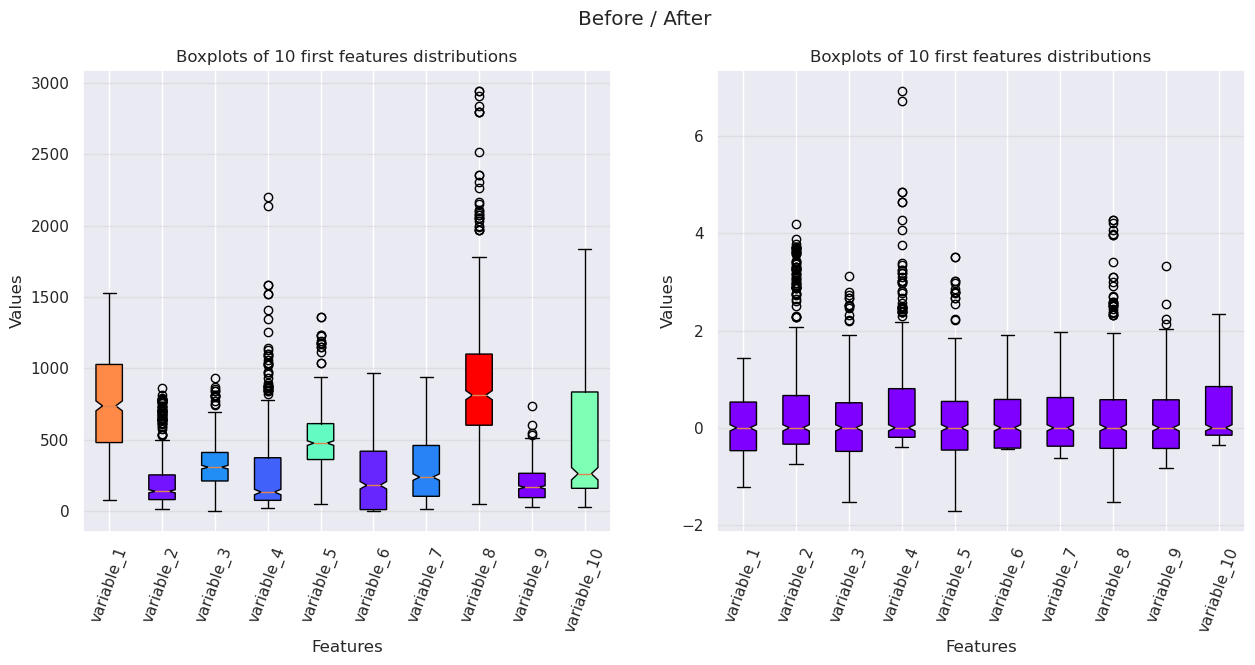

In [41]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'robust_scaling', based='metabolite'))

## f - Autoscaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}
\end{eqnarray}

_Use <code>StandardScaler()</code> function from <code>scikitlearn</code> package_

In [42]:
normPeakTable(intensities, 'autoscaling', based='metabolites')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,-1.523180,-0.466279,2.694836,-0.559154,2.202369,-0.830603,-1.103649,1.850258,-0.695065,1.813873,...,7.621123,-0.649561,-2.205153,-0.011033,-1.754818,-1.600121,-1.432225,-0.295467,-2.178060,0.563721
1,-0.490516,-0.400932,1.718301,-0.434315,1.977550,-0.832562,-0.989522,1.434141,-0.841793,1.754387,...,6.297668,-0.952143,-2.213227,-0.300655,-1.988847,-0.770904,-1.361925,-0.659125,-1.633666,1.317045
2,-1.313858,0.006079,2.061363,-0.584024,0.666223,-0.917380,-0.413964,1.443897,2.297000,1.717075,...,0.757140,1.677510,1.513817,1.693279,1.002536,1.060239,-0.786883,2.466061,-0.450616,-0.000055
3,-0.530099,0.089876,1.666831,-0.532142,0.636658,-0.885111,-0.901872,1.633080,1.704538,1.934970,...,0.783459,0.620629,1.643205,2.400656,2.233531,-0.858614,-0.560176,1.566596,-1.287694,1.161409
4,-1.501550,-0.435152,1.995915,-0.752594,1.113596,-0.891332,-0.940465,2.750423,2.518512,-0.157016,...,-0.447377,2.433959,0.282157,0.652786,0.493293,-0.098511,1.633078,2.851567,0.337086,-0.442850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.572655,-0.105264,0.056485,2.652053,0.544087,2.124626,1.968871,-0.171010,-0.787036,-0.481241,...,-0.422282,-0.624861,0.831362,0.646119,0.773113,0.912986,1.724914,-1.153545,0.045793,0.138595
596,-0.127043,-0.612327,-0.163238,-0.202287,-0.662214,0.112089,-0.393432,-0.906146,0.860382,-0.933634,...,0.058425,-0.138408,-0.816321,-0.682939,-0.614552,0.743511,-0.509834,-0.204340,-0.407189,-0.484445
597,0.789382,2.530401,0.375890,1.047471,-0.353786,0.350246,0.619682,0.007911,0.750430,1.774879,...,-0.536520,0.401936,2.385540,2.206110,2.153803,1.066208,0.336524,0.203901,2.967205,2.866041
598,0.318492,-0.919452,-0.900941,0.140804,-1.014255,0.982785,0.393019,-1.182877,-0.072304,-0.920738,...,-0.299730,-0.524585,-1.684956,-1.152996,-1.060571,1.956614,-1.358425,-1.250776,-0.182277,-1.315277


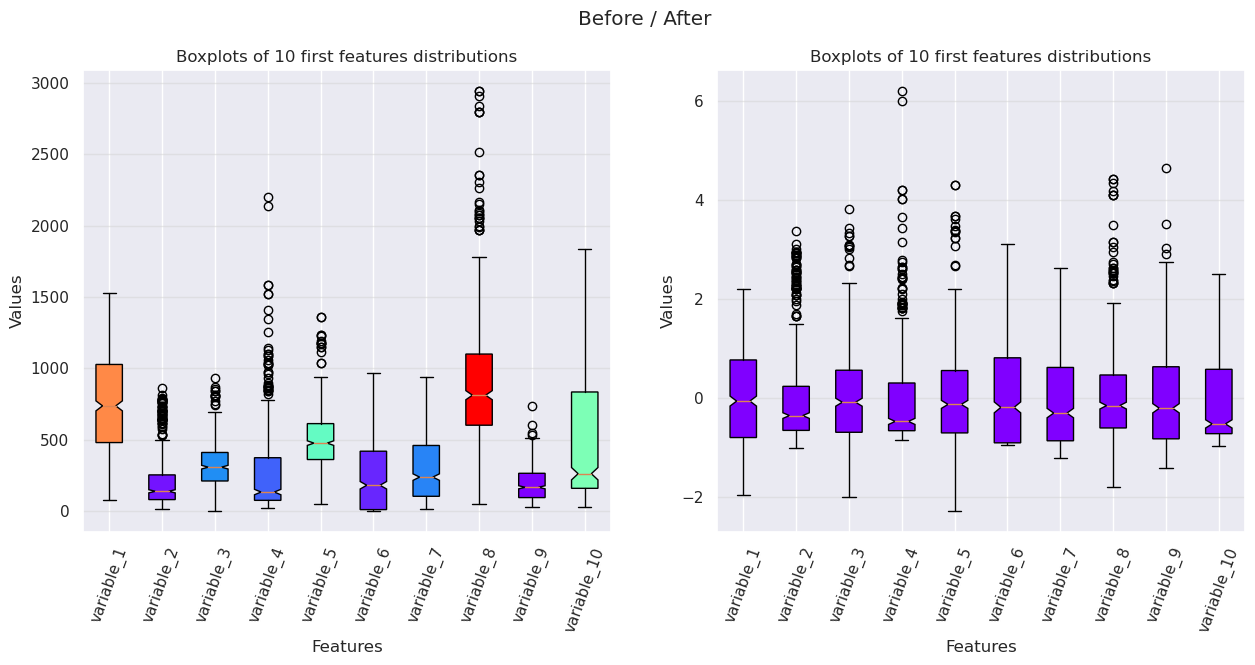

In [43]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'autoscaling', based='metabolite'))

## g - Pareto scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\sqrt{s_j}}
\end{eqnarray}

In [44]:
normPeakTable(intensities, 'pareto_scaling', based='metabolites')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,-28.443563,-6.499976,33.996519,-9.837250,31.106211,-12.813496,-17.101450,39.913573,-7.512362,41.310459,...,406.280106,-11.976016,-19.777438,-0.092502,-13.813500,-18.238678,-20.086597,-2.425795,-30.921340,2.204492
1,-9.159802,-5.589023,21.677111,-7.640930,27.930874,-12.843714,-15.333017,30.937141,-9.098221,39.955690,...,335.727024,-17.554738,-19.849849,-2.520763,-15.655723,-8.787008,-19.100660,-5.411435,-23.192724,5.150442
2,-24.534712,0.084735,26.004976,-10.274787,9.409713,-14.152175,-6.414521,31.147596,24.826294,39.105914,...,40.362960,30.928403,13.577026,14.196829,7.891719,12.084934,-11.035838,20.246439,-6.397280,-0.000215
3,-9.898961,1.252878,21.027796,-9.362009,8.992149,-13.654363,-13.974848,35.228630,18.422888,44.068407,...,41.765993,11.442597,14.737469,20.127643,17.581814,-9.786750,-7.856332,12.861804,-18.281042,4.541811
4,-28.039642,-6.066051,25.179321,-13.240456,15.728400,-13.750337,-14.572858,59.331851,27.220425,-3.575989,...,-23.849530,44.875107,2.530591,5.473104,3.883085,-1.122863,22.903508,23.411453,4.785526,-1.731811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,29.367445,-1.467394,0.712584,46.657783,7.684669,32.776039,30.508385,-3.689001,-8.506396,-10.960138,...,-22.511759,-11.520613,7.456267,5.417209,6.085757,10.406494,24.191481,-9.470636,0.650104,0.541991
596,-2.372374,-8.535888,-2.059315,-3.558847,-9.353090,1.729159,-6.096368,-19.547295,9.299134,-21.263262,...,3.114624,-2.551834,-7.321371,-5.725914,-4.837604,8.474773,-7.150296,-1.677638,-5.780756,-1.894475
597,14.740770,35.274013,4.742010,18.428235,-4.996864,5.403149,9.602208,0.170663,8.110752,40.422371,...,-28.601745,7.410536,21.395285,18.496522,16.954216,12.152966,4.719664,1.674035,42.124610,11.207955
598,5.947452,-12.817236,-11.365756,2.477179,-14.325319,15.161155,6.089976,-25.516896,-0.781475,-20.969546,...,-15.978526,-9.671814,-15.111929,-9.666979,-8.348560,22.302095,-19.051576,-10.268910,-2.587742,-5.143529


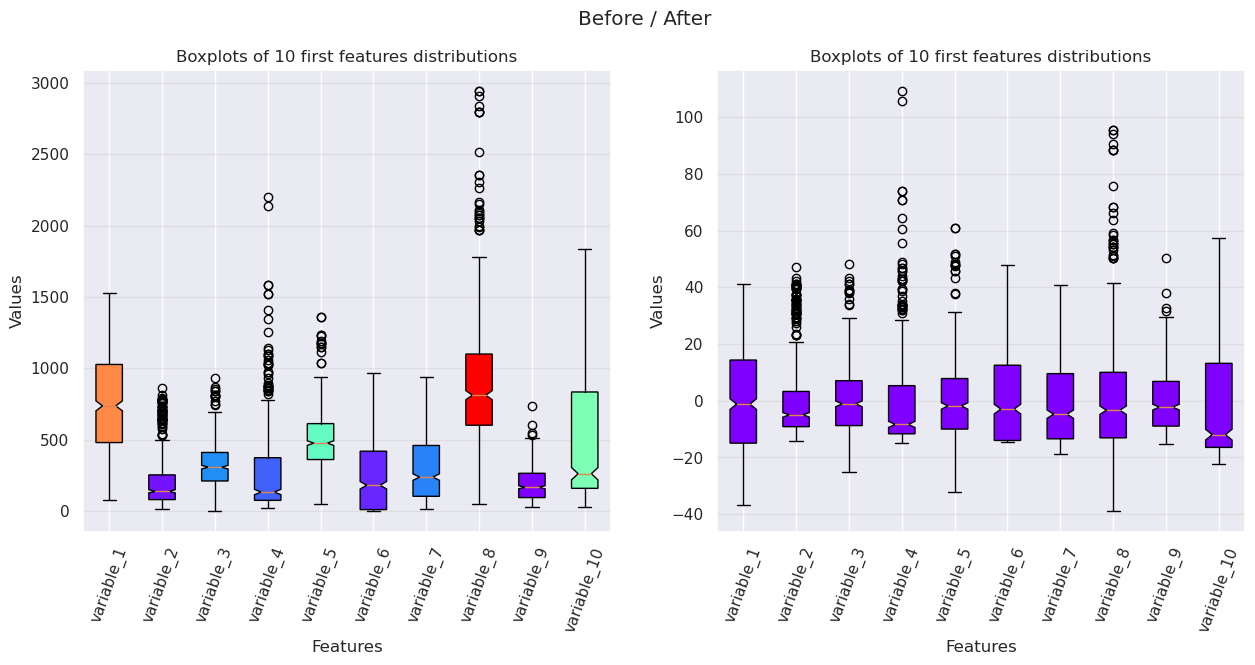

In [45]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'pareto_scaling', based='metabolite'))

## h - Vast scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j} \cdot \frac{\bar{x}_j}{s_j}
\end{eqnarray}

In [46]:
normPeakTable(intensities, 'vast_scaling', based='metabolites')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,-3.315232,-0.498183,5.437701,-0.505680,5.541141,-0.788702,-1.430691,3.513575,-1.135289,1.866567,...,4.488857,-1.082516,-4.934833,-0.020571,-3.622299,-2.624360,-3.264443,-0.428264,-4.837218,1.976955
1,-1.067618,-0.428364,3.467227,-0.392779,4.975498,-0.790562,-1.282745,2.723383,-1.374948,1.805353,...,3.709338,-1.586779,-4.952901,-0.560590,-4.105383,-1.264361,-3.104210,-0.955365,-3.628183,4.618837
2,-2.859637,0.006494,4.159464,-0.528172,1.676210,-0.871101,-0.536633,2.741910,3.751818,1.766957,...,0.445957,2.795628,3.387716,3.157219,2.069437,1.738899,-1.793527,3.574420,-1.000766,-0.000193
3,-1.153771,0.096025,3.363370,-0.481251,1.601827,-0.840460,-1.169122,3.101161,2.784118,1.991182,...,0.461459,1.034300,3.677268,4.476167,4.610460,-1.408214,-1.276799,2.270695,-2.859818,4.073026
4,-3.268153,-0.464926,4.027401,-0.680621,2.801797,-0.846367,-1.219151,5.222957,4.113626,-0.161577,...,-0.263506,4.056276,0.631429,1.217158,1.018257,-0.161569,3.722243,4.133189,0.748630,-1.553061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3.422915,-0.112467,0.113977,2.398427,1.368917,2.017446,2.552302,-0.324741,-1.285510,-0.495222,...,-0.248725,-1.041352,1.860475,1.204728,1.595861,1.497389,3.931562,-1.671999,0.101700,0.486050
596,-0.276511,-0.654224,-0.329385,-0.182941,-1.666124,0.106434,-0.510016,-1.720740,1.405311,-0.960757,...,0.034412,-0.230661,-1.826816,-1.273380,-1.268559,1.219434,-1.162055,-0.296180,-0.904320,-1.698936
597,1.718106,2.703537,0.758479,0.947297,-0.890122,0.332577,0.803311,0.015023,1.225719,1.826440,...,-0.316011,0.669841,5.338515,4.113423,4.445885,1.748688,0.767032,0.295544,6.589816,10.051122
598,0.693204,-0.982363,-1.817939,0.127338,-2.551857,0.933207,0.509481,-2.246241,-0.118099,-0.947485,...,-0.176542,-0.874238,-3.770703,-2.149830,-2.189234,3.209045,-3.096233,-1.812931,-0.404817,-4.612638


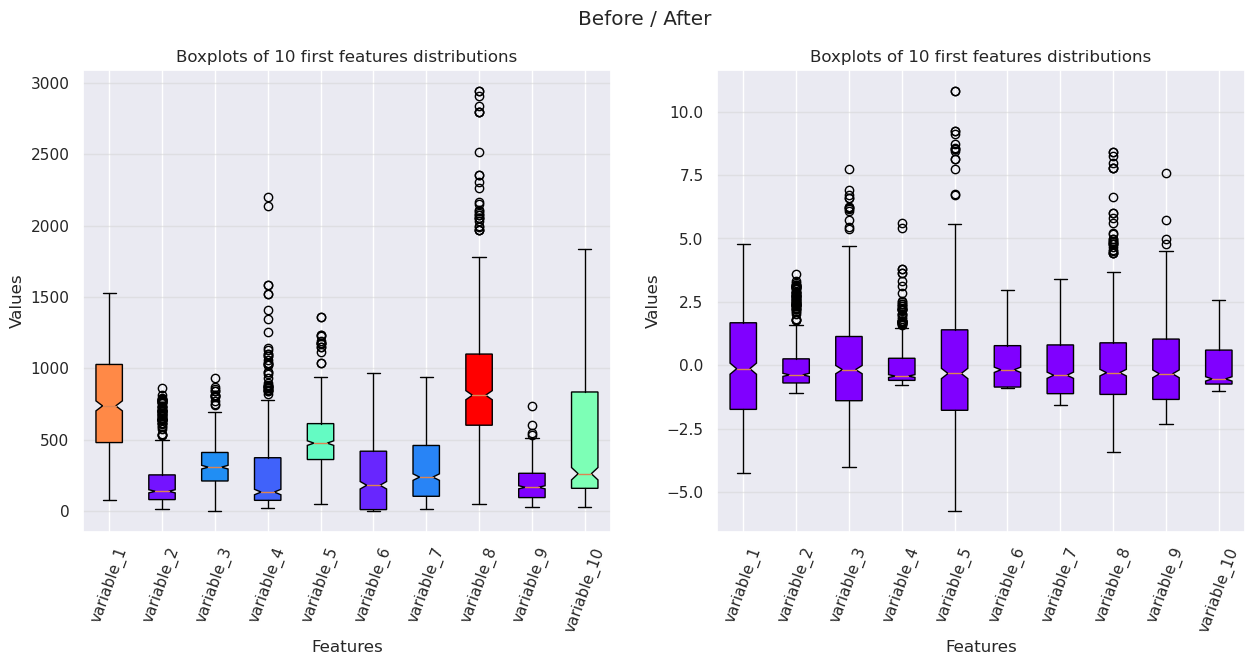

In [47]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'vast_scaling', based='metabolite'))

### Conclusion : For the scaling methods, the point is to align the mean of each feature on the same value and/or make all the values part of the same range (e.g. same min and/or max). This step allows to compare features with the same importance.

# 4 - Sample-based Normalisation Methods

### Scaling : Each value in the peak table is transformed based on other values in the same row (sample-based)

At this point, we want to __normalise__ our peak table based on metabolite values

*Reminder : peak table of dimension $(n,p)$, rows = samples with iterator $i$, columns = features (metabolites) with iterator $j$*

Inspired by [this course](https://www.uab.edu/proteomics/metabolomics/workshop/2014/statistical%20analysis.pdf) and [this paper (NOREVA)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5570188/), here are all the Metabolite-based Normalization Methods available in this notebook :

<table>
  <tr>
    <th>Method</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>Mean normalisation</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = x_{ij} - \bar{x}_i
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Median normalisation</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = x_{ij} - Q_2(x_i)
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>L1 normalisation</td>
    <td>
        \begin{eqnarray}
             \sum_{i=1}^p x_{ni} = 1
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>L2 normalisation</td>
    <td>
        \begin{eqnarray}
            \sqrt{\sum_{i=1}^p x_{ni} ^2} = 1
        \end{eqnarray}
    </td>
  </tr>
</table>

## a - Mean normalisation

\begin{eqnarray}
    \tilde{x}_{ij} = x_{ij} - \bar{x}_i
\end{eqnarray}

In [48]:
normPeakTable(intensities, 'mean_normalisation', based='samples')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,-1306.331054,-1417.145488,-784.142264,-1427.308884,-592.907306,-1505.849317,-1487.894209,210.531181,-1424.550294,-59.567070,...,21798.430966,-1188.461889,-1531.526358,-1403.863467,-1514.986660,-1528.963261,-1367.547164,-1456.374168,-1525.526628,-1471.905143
1,-1123.060981,-1581.277749,-1116.387932,-1565.499879,-814.586718,-1683.146498,-1637.322713,-159.938516,-1618.521502,-267.252581,...,17860.433444,-1468.148284,-1709.006820,-1601.053577,-1706.319223,-1598.061199,-1530.550676,-1657.717386,-1592.636558,-1637.215722
2,-1944.591755,-2036.607837,-1596.212832,-2146.260314,-1610.601964,-2237.754574,-2033.550106,-689.821388,-1786.283387,-821.028783,...,1580.228940,-1108.683268,-1943.632745,-1995.312300,-2055.382223,-1894.579069,-1951.866354,-1981.488237,-1888.618901,-2191.780692
3,-1778.199460,-2127.236628,-1765.914898,-2237.114544,-1723.412429,-2336.987756,-2257.612968,-708.698556,-1962.405092,-814.922161,...,1548.111500,-1574.857524,-2040.137833,-2052.499817,-2086.016938,-2250.792165,-2014.187376,-2149.029116,-2164.242305,-2280.931421
4,-1284.041419,-1396.349640,-880.628127,-1472.434867,-795.356267,-1505.554821,-1433.965858,644.167175,-1034.406585,-1067.096675,...,-1116.921512,-125.545996,-1316.704614,-1342.453275,-1360.936521,-1319.124973,-749.874831,-1229.502673,-1003.858901,-1472.551580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-645.055305,-1765.266309,-1622.308888,-851.662655,-1341.988088,-1220.827211,-1168.437671,-1148.334558,-1853.569415,-1668.290978,...,-1478.627642,-1598.341039,-1705.549873,-1775.944266,-1776.619972,-1620.732101,-1164.833674,-1932.487986,-1495.590727,-1896.681987
596,-868.545828,-1494.589239,-1288.065079,-1365.915378,-1213.416515,-1330.566612,-1366.429353,-1121.215558,-1291.912245,-1533.729289,...,256.720682,-1063.770404,-1468.874118,-1500.158215,-1493.393523,-1273.537960,-1235.181738,-1499.294725,-1217.675425,-1536.997538
597,-1105.498524,-1440.395427,-1758.783557,-1535.614991,-1708.409393,-1830.409083,-1679.694229,-1252.381889,-1861.276564,-685.376087,...,-1990.590833,-1436.613449,-1767.842091,-1853.591971,-1878.373699,-1788.132878,-1625.228648,-2028.297505,-1094.095844,-2042.279222
598,-416.867235,-1257.955783,-1109.154016,-963.407270,-987.328330,-827.038995,-881.281614,-953.675344,-1104.549056,-1230.724154,...,-464.814375,-898.726258,-1242.429756,-1236.885169,-1224.715098,-819.613998,-1105.778393,-1273.513507,-876.029237,-1253.387481


In [49]:
normPeakTable(intensities, 'mean_normalisation', based='samples').mean(axis=1).round()

0     -0.0
1     -0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596   -0.0
597    0.0
598    0.0
599   -0.0
Length: 600, dtype: float64

All rows (samples) have a __mean value equal to 0__

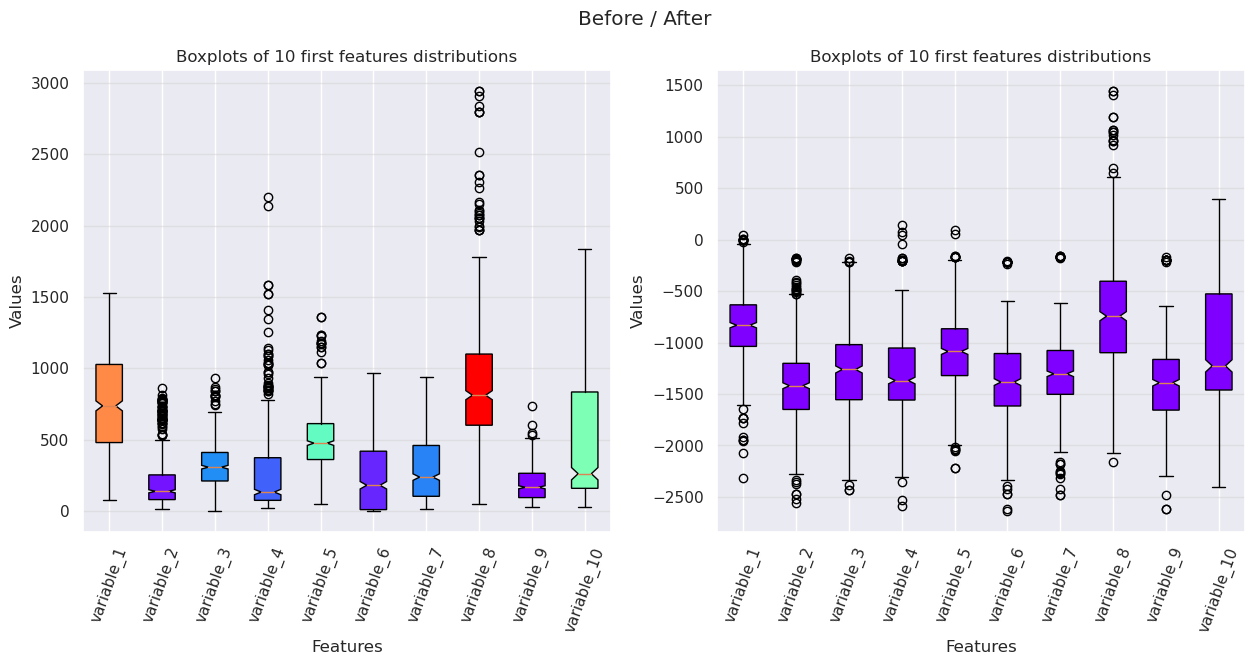

In [50]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'mean_normalisation', based='samples'))

## b - Median normalisation

\begin{eqnarray}
    \tilde{x}_{ij} = x_{ij} - Q_2(x_i)
\end{eqnarray}

In [51]:
normPeakTable(intensities, 'median_normalisation', based='samples')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,-21.490475,-132.304909,500.698315,-142.468305,691.933273,-221.008739,-203.053630,1495.371759,-139.709715,1225.273509,...,23083.271545,96.378690,-246.685779,-119.022888,-230.146081,-244.122682,-82.706585,-171.533589,-240.686049,-187.064564
1,298.820463,-159.396306,305.493511,-143.618436,607.294725,-261.265055,-215.441270,1261.942927,-196.640059,1154.628863,...,19282.314887,-46.266841,-287.125377,-179.172134,-284.437780,-176.179755,-108.669232,-235.835942,-170.755114,-215.334279
2,-199.701516,-291.717598,148.677407,-401.370075,134.288275,-492.864335,-288.659867,1055.068852,-41.393147,923.861457,...,3325.119179,636.206971,-198.742506,-250.422061,-310.491983,-149.688829,-206.976115,-236.597998,-143.728661,-446.890453
3,87.931695,-261.105473,100.216257,-370.983389,142.718726,-470.856601,-391.481813,1157.432599,-96.273936,1051.208994,...,3414.242655,291.273631,-174.006677,-186.368662,-219.885783,-384.661009,-148.056221,-282.897961,-298.111150,-414.800266
4,-105.783040,-218.091262,297.630251,-294.176489,382.902112,-327.296443,-255.707480,1822.425553,143.851793,111.161704,...,61.336867,1052.712383,-138.446235,-164.194897,-182.678143,-140.866595,428.383548,-51.244294,174.399478,-294.293201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,883.237522,-236.973482,-94.016062,676.630172,186.304739,307.465616,359.855156,379.958269,-325.276588,-139.998151,...,49.665185,-70.048212,-177.257046,-247.651439,-248.327145,-92.439274,363.459153,-404.195159,32.702100,-368.389160
596,381.535898,-244.507513,-37.983353,-115.833651,36.665211,-80.484886,-116.347627,128.866168,-41.830519,-283.647563,...,1506.802408,186.311322,-218.792391,-250.076488,-243.311797,-23.456233,14.899988,-249.212999,32.406301,-286.915812
597,589.681589,254.784685,-63.603445,159.565122,-13.229281,-135.228970,15.485883,442.798224,-166.096452,1009.804026,...,-295.410721,258.566663,-72.661979,-158.411859,-183.193586,-92.952766,69.951465,-333.117393,601.084268,-347.099110
598,594.724541,-246.364007,-97.562240,48.184507,24.263446,184.552782,130.310162,57.916432,-92.957280,-219.132378,...,546.777401,112.865518,-230.837980,-225.293393,-213.123322,191.977778,-94.186617,-261.921731,135.562539,-241.795705


In [52]:
normPeakTable(intensities, 'median_normalisation', based='samples').median(axis=1).round(4)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    0.0
Length: 600, dtype: float64

All rows (samples) have a __median value equal to 0__

In [53]:
row_medians = np.median(intensities, axis=1).round(4)
row_medians = np.array(row_medians).reshape((row_medians.shape[0], 1))
print(f'Median :\n{(intensities - row_medians).median(axis=1)}\n')
print(f'Mean :\n{(intensities - row_medians).mean(axis=1)}')

Median :
0     -5.146686e-06
1     -4.442001e-05
2      4.284600e-05
3      2.782721e-05
4      3.987925e-06
           ...     
595    6.202407e-06
596   -5.099583e-07
597    3.177270e-05
598    2.525726e-05
599    1.270144e-06
Length: 600, dtype: float64

Mean :
0      1284.840574
1      1421.881399
2      1744.890282
3      1866.131183
4      1178.258382
          ...     
595    1528.292833
596    1250.081726
597    1695.180144
598    1011.591801
599    1717.527031
Length: 600, dtype: float64


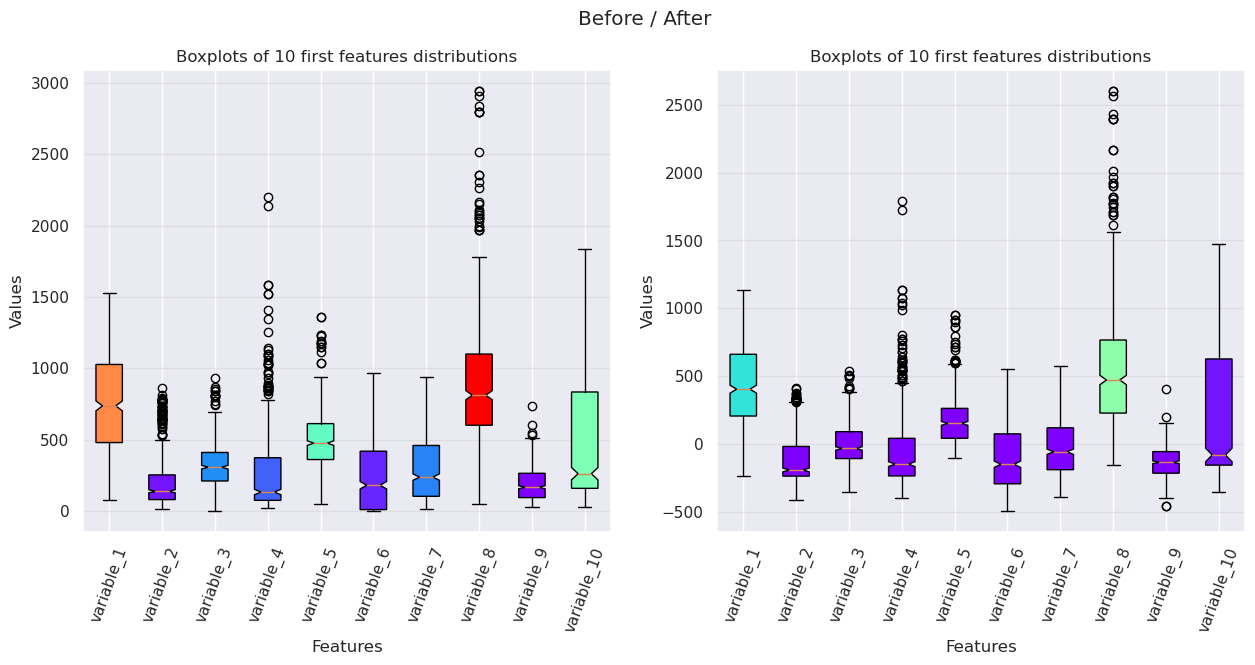

In [54]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'median_normalisation', based='samples'))

## c - L1 normalisation

After this normalisation, for each sample n, index of metabolites = $\{1,p\}$, the transformed peak table verify :

\begin{eqnarray}
     \sum_{i=1}^p x_{ni} = 1
\end{eqnarray}

In [55]:
normPeakTable(intensities, 'l1_normalisation', based='samples')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,0.000253,0.000130,0.000833,0.000119,0.001045,0.000031,0.000051,0.001937,0.000122,0.001637,...,0.025909,0.000384,0.000003,0.000145,0.000021,0.000006,0.000185,0.000086,0.000010,0.000069
1,0.000585,0.000129,0.000592,0.000145,0.000893,0.000028,0.000073,0.001544,0.000092,0.001437,...,0.019487,0.000242,0.000002,0.000109,0.000005,0.000112,0.000180,0.000053,0.000118,0.000073
2,0.000228,0.000158,0.000493,0.000075,0.000482,0.000006,0.000161,0.001180,0.000348,0.001081,...,0.002902,0.000862,0.000229,0.000190,0.000144,0.000266,0.000223,0.000200,0.000271,0.000041
3,0.000416,0.000163,0.000425,0.000083,0.000455,0.000011,0.000069,0.001190,0.000282,0.001113,...,0.002825,0.000563,0.000226,0.000217,0.000193,0.000074,0.000245,0.000147,0.000136,0.000052
4,0.000264,0.000138,0.000716,0.000053,0.000812,0.000016,0.000096,0.002426,0.000544,0.000507,...,0.000451,0.001563,0.000227,0.000198,0.000178,0.000225,0.000863,0.000325,0.000578,0.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.001141,0.000163,0.000288,0.000960,0.000533,0.000638,0.000684,0.000702,0.000086,0.000248,...,0.000413,0.000309,0.000215,0.000154,0.000153,0.000289,0.000687,0.000017,0.000399,0.000049
596,0.000769,0.000095,0.000318,0.000234,0.000398,0.000272,0.000233,0.000497,0.000313,0.000053,...,0.001980,0.000559,0.000123,0.000089,0.000097,0.000333,0.000374,0.000090,0.000393,0.000050
597,0.000823,0.000557,0.000303,0.000481,0.000343,0.000246,0.000366,0.000706,0.000222,0.001158,...,0.000119,0.000560,0.000296,0.000228,0.000208,0.000280,0.000410,0.000089,0.000833,0.000078
598,0.001152,0.000038,0.000235,0.000428,0.000397,0.000609,0.000537,0.000441,0.000241,0.000074,...,0.001088,0.000514,0.000059,0.000066,0.000082,0.000619,0.000240,0.000018,0.000544,0.000044


In [56]:
normPeakTable(intensities, 'l1_normalisation', based='samples').sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Length: 600, dtype: float64

After this normalisation, the __sum of all values in a row (sample) equals 1__

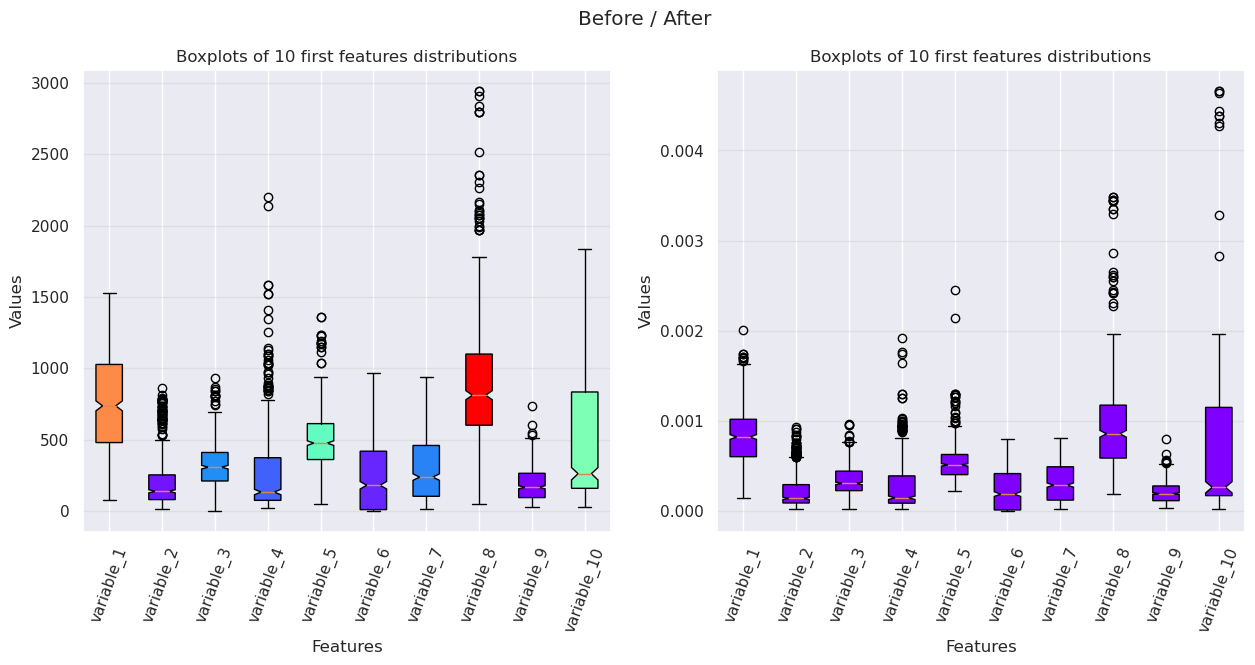

In [57]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'l1_normalisation', based='samples'))

## d - L2 normalisation

After this normalisation, for each sample n, index of metabolites = $\{1,p\}$, the transformed peak table verify :

\begin{eqnarray}
    \sqrt{\sum_{i=1}^p x_{ni} ^2} = 1
\end{eqnarray}

In [58]:
normPeakTable(intensities, 'l2_normalisation', based='samples')

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,0.000900,0.000462,0.002962,0.000422,0.003717,0.000112,0.000183,0.006891,0.000433,0.005824,...,0.092153,0.001365,0.000010,0.000515,0.000076,0.000021,0.000658,0.000307,0.000034,0.000246
1,0.001956,0.000431,0.001978,0.000484,0.002982,0.000093,0.000245,0.005159,0.000308,0.004802,...,0.065102,0.000808,0.000007,0.000366,0.000016,0.000376,0.000600,0.000177,0.000394,0.000245
2,0.001048,0.000727,0.002262,0.000345,0.002212,0.000027,0.000738,0.005419,0.001600,0.004962,...,0.013328,0.003960,0.001051,0.000871,0.000662,0.001222,0.001023,0.000919,0.001243,0.000187
3,0.001678,0.000658,0.001714,0.000337,0.001838,0.000045,0.000277,0.004803,0.001139,0.004493,...,0.011398,0.002272,0.000912,0.000876,0.000778,0.000297,0.000988,0.000594,0.000550,0.000209
4,0.000937,0.000490,0.002542,0.000187,0.002882,0.000055,0.000340,0.008611,0.001930,0.001800,...,0.001602,0.005548,0.000807,0.000704,0.000631,0.000797,0.003063,0.001154,0.002052,0.000186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.003573,0.000512,0.000902,0.003008,0.001668,0.001999,0.002143,0.002198,0.000270,0.000777,...,0.001295,0.000968,0.000675,0.000482,0.000480,0.000907,0.002152,0.000055,0.001249,0.000152
596,0.002925,0.000363,0.001208,0.000889,0.001513,0.001034,0.000887,0.001891,0.001192,0.000203,...,0.007530,0.002126,0.000468,0.000340,0.000368,0.001267,0.001424,0.000343,0.001496,0.000189
597,0.003008,0.002034,0.001108,0.001757,0.001255,0.000900,0.001338,0.002581,0.000810,0.004230,...,0.000434,0.002045,0.001082,0.000832,0.000760,0.001023,0.001496,0.000324,0.003041,0.000283
598,0.003766,0.000125,0.000769,0.001400,0.001297,0.001991,0.001756,0.001443,0.000789,0.000243,...,0.003559,0.001680,0.000193,0.000217,0.000269,0.002023,0.000784,0.000058,0.001779,0.000145


After this normalisation, the __squared root of the sum of all values-squared in a row (sample) equals 1__

In [59]:
np.sqrt((normPeakTable(intensities, 'l2_normalisation', based='samples') ** 2).sum(axis=1))

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Length: 600, dtype: float64

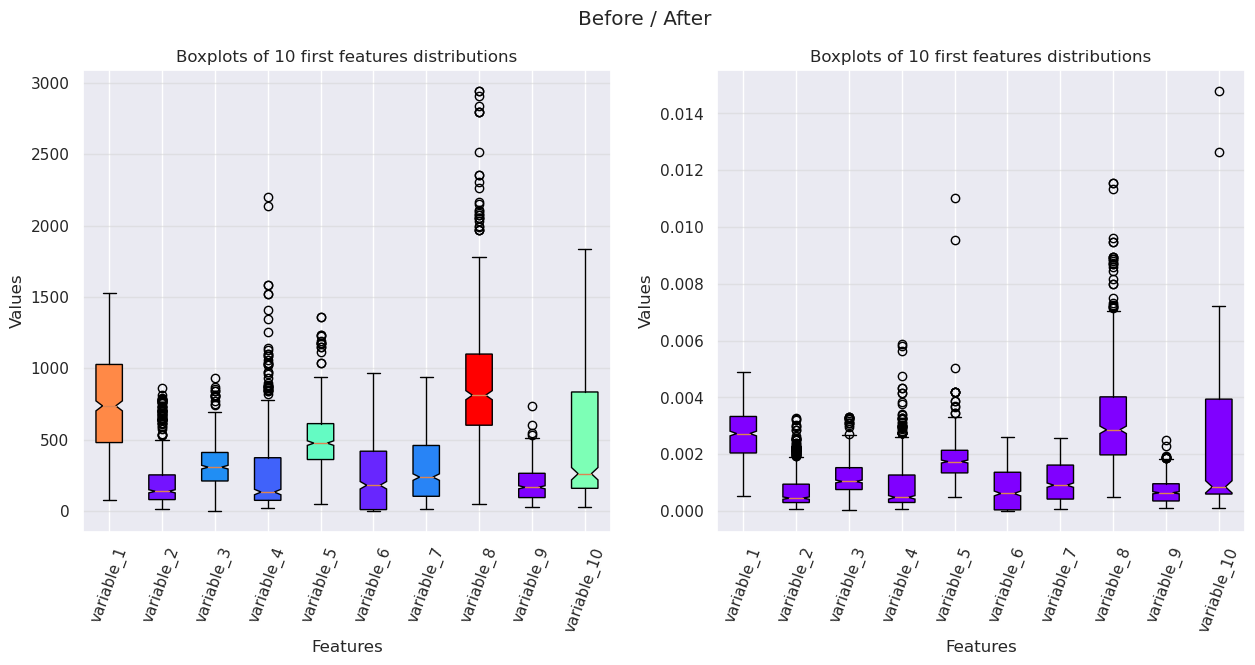

In [60]:
boxplot_first_distributions_metabolites_before_after(X_init=intensities, X_norm=normPeakTable(intensities, 'l2_normalisation', based='samples'))

### Conclusion : For the normalisation methods, the point is to make all samples comparable by aligning mean or median between samples, or setting vector norm to 1 (l1 or l2 norm). This step allows to compare samples with the same importance.

# 5 - Combination of methods for our example

### We decide here to preprocess data with classical methods :
- first a l2 normalisation (on samples)
- then a standard scaling / autoscaling (on features)

### We first apply the normalisation on samples to make them comparable then for the scaling of each features.

In [61]:
normalisation_method = 'l2_normalisation'
scaling_method = 'autoscaling'

In [62]:
intensities_ = normPeakTable(intensities, 'l2_normalisation', based='samples')
intensities_ = normPeakTable(intensities_, 'autoscaling', based='metabolites')
intensities_

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,-1.983183,-0.429018,2.824231,-0.553917,2.278529,-0.843289,-1.281787,2.015994,-0.647035,1.851448,...,6.039447,-0.533685,-2.535303,0.255774,-1.995660,-1.547069,-1.255285,-0.227843,-1.960129,0.307408
1,-0.803025,-0.473063,1.259192,-0.485797,1.381157,-0.869131,-1.189554,1.050217,-0.941043,1.351718,...,4.124181,-0.890197,-2.550686,-0.441075,-2.315032,-0.813840,-1.328082,-0.689359,-1.531897,0.303644
2,-1.817536,-0.048073,1.710474,-0.638117,0.441714,-0.957922,-0.459878,1.195275,2.090062,1.429943,...,0.458396,1.125524,1.678958,1.925001,1.115694,0.934150,-0.796248,1.945638,-0.520464,-0.164853
3,-1.113688,-0.148127,0.839057,-0.647745,-0.014157,-0.933493,-1.142600,0.851446,1.010614,1.200176,...,0.321751,0.046023,1.115955,1.947709,1.732225,-0.976826,-0.839741,0.790524,-1.346198,0.009451
4,-1.941870,-0.389329,2.156687,-0.812360,1.259127,-0.919584,-1.048919,2.975657,2.866132,-0.116995,...,-0.371845,2.140541,0.688788,1.143439,0.949568,0.056426,1.772022,2.777622,0.442811,-0.167589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.004694,-0.358116,-0.451047,2.289993,-0.220913,1.698589,1.618726,-0.601989,-1.028769,-0.617779,...,-0.393583,-0.787929,0.154201,0.104797,0.152321,0.282282,0.626077,-1.124906,-0.513887,-0.440686
596,0.280099,-0.571789,0.034961,-0.040087,-0.409897,0.398472,-0.239218,-0.773168,1.134281,-0.898590,...,0.047866,-0.047429,-0.682903,-0.561635,-0.446705,1.027262,-0.290615,-0.099159,-0.219241,-0.146279
597,0.373312,1.828142,-0.123822,0.914150,-0.725616,0.217681,0.428026,-0.388149,0.237521,1.071712,...,-0.454551,-0.099047,1.801741,1.742339,1.636600,0.522069,-0.199769,-0.167749,1.621049,0.608253
598,1.220808,-0.912670,-0.662096,0.521922,-0.674001,1.686866,1.046442,-1.023170,0.189403,-0.878696,...,-0.233291,-0.332216,-1.797924,-1.139048,-0.968825,2.587240,-1.096590,-1.112620,0.117433,-0.498855


### For the next notebook, the imputed and normalised peak table right above should be used ! We save it in a separate folder

In [63]:
peakTable_preprocessed = pd.concat([metadata, intensities_], axis=1)
peakTable_preprocessed

,SampleID,Disease,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,CRR_001,CRR,-1.983183,-0.429018,2.824231,-0.553917,2.278529,-0.843289,-1.281787,2.015994,...,6.039447,-0.533685,-2.535303,0.255774,-1.995660,-1.547069,-1.255285,-0.227843,-1.960129,0.307408
1,CRR_002,CRR,-0.803025,-0.473063,1.259192,-0.485797,1.381157,-0.869131,-1.189554,1.050217,...,4.124181,-0.890197,-2.550686,-0.441075,-2.315032,-0.813840,-1.328082,-0.689359,-1.531897,0.303644
2,CRR_003,CRR,-1.817536,-0.048073,1.710474,-0.638117,0.441714,-0.957922,-0.459878,1.195275,...,0.458396,1.125524,1.678958,1.925001,1.115694,0.934150,-0.796248,1.945638,-0.520464,-0.164853
3,CRR_004,CRR,-1.113688,-0.148127,0.839057,-0.647745,-0.014157,-0.933493,-1.142600,0.851446,...,0.321751,0.046023,1.115955,1.947709,1.732225,-0.976826,-0.839741,0.790524,-1.346198,0.009451
4,CRR_005,CRR,-1.941870,-0.389329,2.156687,-0.812360,1.259127,-0.919584,-1.048919,2.975657,...,-0.371845,2.140541,0.688788,1.143439,0.949568,0.056426,1.772022,2.777622,0.442811,-0.167589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,HCC_296,HCC,1.004694,-0.358116,-0.451047,2.289993,-0.220913,1.698589,1.618726,-0.601989,...,-0.393583,-0.787929,0.154201,0.104797,0.152321,0.282282,0.626077,-1.124906,-0.513887,-0.440686
596,HCC_297,HCC,0.280099,-0.571789,0.034961,-0.040087,-0.409897,0.398472,-0.239218,-0.773168,...,0.047866,-0.047429,-0.682903,-0.561635,-0.446705,1.027262,-0.290615,-0.099159,-0.219241,-0.146279
597,HCC_298,HCC,0.373312,1.828142,-0.123822,0.914150,-0.725616,0.217681,0.428026,-0.388149,...,-0.454551,-0.099047,1.801741,1.742339,1.636600,0.522069,-0.199769,-0.167749,1.621049,0.608253
598,HCC_299,HCC,1.220808,-0.912670,-0.662096,0.521922,-0.674001,1.686866,1.046442,-1.023170,...,-0.233291,-0.332216,-1.797924,-1.139048,-0.968825,2.587240,-1.096590,-1.112620,0.117433,-0.498855


#### To keep the information on which imputation/normalisation/scaling methods have been used, we concatenate everything in the filename

In [64]:
filename_imputed

'peakTable-python_MICE_ExtraTreesRegressor.csv'

In [65]:
filename_preprocessed = re.sub('_imputed', '', filename_imputed)
filename_preprocessed = re.sub('.csv', '', filename_preprocessed)
filename_preprocessed = '-'.join([filename_preprocessed, normalisation_method, scaling_method]) + '.csv'
filename_preprocessed

'peakTable-python_MICE_ExtraTreesRegressor-l2_normalisation-autoscaling.csv'

### Path to save preprocessed peak table

In [66]:
path_peakTable_preprocessed = pwd + 'data/synthetic_dataset/preprocessed_peak_tables/'

if os.path.exists(path_peakTable_preprocessed):
    print(f'Directory {path_peakTable_preprocessed} already exists !')
else:
    os.makedirs(path_peakTable_preprocessed)
    print(f'Directory {path_peakTable_preprocessed} created !')

Directory /home/jovyan/work/data/synthetic_dataset/preprocessed_peak_tables/ already exists !


In [67]:
peakTable_preprocessed.to_csv(path_peakTable_preprocessed + filename_preprocessed, header=True, index=False)
print(f'Preprocessed peak table {filename_preprocessed} saved in :\n\t{path_peakTable_preprocessed}')

Preprocessed peak table peakTable-python_MICE_ExtraTreesRegressor-l2_normalisation-autoscaling.csv saved in :
	/home/jovyan/work/data/synthetic_dataset/preprocessed_peak_tables/
